### Probability practice

In [32]:
#Part A.

Prob_RC = 0.3  # Probability for Random Clicker (RC)
Prob_TC = 1 - P_RC  # Probability for Truthful Clicker (TC)
ProbAnswerYes = 0.65  # Fraction of all people who answered Yes
ProbAnswerYes_RC = 0.5  # Probability that a Random Clicker answered Yes (equal probability)

# Probability calculation
ProbAnswerYes_TC = (ProbAnswerYes - (ProbAnswerYes_RC * Prob_RC)) / Prob_TC

# Answer
ProbAnswerYes_TC 
#0.7142857142857143 -- Answer: 71.4% of people who are truthful clickers answered yes. 

0.7142857142857143

In [34]:
#Part B.

Prob_Disease = 0.000025  # Probability of having the disease
Prob_No_Disease = 1 - Prob_Disease  # Probability of not having the disease

Prob_Sensitivity = 0.993  # P(Positive|Disease)
Prob_Specificity = 0.9999  # P(Negative|No Disease)
Prob_Positive_No_Disease = 1 - Prob_Specificity  # False Positive Rate

# Total probability of testing positive for disease
Prob_Positive = (Prob_Sensitivity * Prob_Disease) + (Prob_Positive_No_Disease * Prob_No_Disease)

# Bayes' Theorem: P(Disease|Positive)
Prob_Disease_Positive = (Prob_Sensitivity * Prob_Disease) / Prob_Positive

# Answer
Prob_Disease_Positive
# 0.19888241302651516-- Answer: Probability of 19.8% someone tests positive that they have the disease.

0.19888241302651516

### Wrangling the Billboard Top 100

In [7]:
#Part A.

import pandas as pd

#Read csv
billboard_df = pd.read_csv('billboard.csv')

# Group by both 'performer' and 'song' to calculate the total number of weeks each unique song spent on the Billboard Top 100
top_songs = billboard_df.groupby(['performer', 'song']).agg({'week_position': 'count'}).reset_index()

# Rename 'week_position' to 'count' to represent the number of weeks
top_songs.rename(columns={'week_position': 'count'}, inplace=True)

# Sort the songs by the total number of weeks and get the top 10
top_10_songs = top_songs.sort_values(by='count', ascending=False).head(10)

# Select only the relevant columns: performer, song, and count
top_10_songs = top_10_songs[['performer', 'song', 'count']]

# Display the top 10 songs since 1958
print(top_10_songs) #Answer

# Table Caption: This table displays the top 10 songs since 1958, by performer, song, and count. There are 10 rows and 3 columns. 

                                       performer  \
11194                            Imagine Dragons   
403                                   AWOLNATION   
27121                                 The Weeknd   
12026                                 Jason Mraz   
15008                                LeAnn Rimes   
18752                                OneRepublic   
14807  LMFAO Featuring Lauren Bennett & GoonRock   
12421                                      Jewel   
506                                        Adele   
4347                            Carrie Underwood   

                                      song  count  
11194                          Radioactive     87  
403                                   Sail     79  
27121                      Blinding Lights     76  
12026                            I'm Yours     76  
15008                        How Do I Live     69  
18752                       Counting Stars     68  
14807                    Party Rock Anthem     68  
12421  Fool

In [34]:
#Part B.

import matplotlib.pyplot as plt

# Filter data excludes years 1958 and 2021
filtered_data = billboard[(billboard['year'] > 1958) & (billboard['year'] < 2021)]

# Group by year and count number of unique songs
musical_diversity = filtered_data.groupby('year')['song'].nunique().reset_index()
musical_diversity

#Answer: It appears the highest number of top songs was in 2020, with 792 songs. 


year  song
0   1959   641
1   1960   668
2   1961   747
3   1962   748
4   1963   739
..   ...   ...
57  2016   520
58  2017   555
59  2018   694
60  2019   621
61  2020   792

[62 rows x 2 columns]

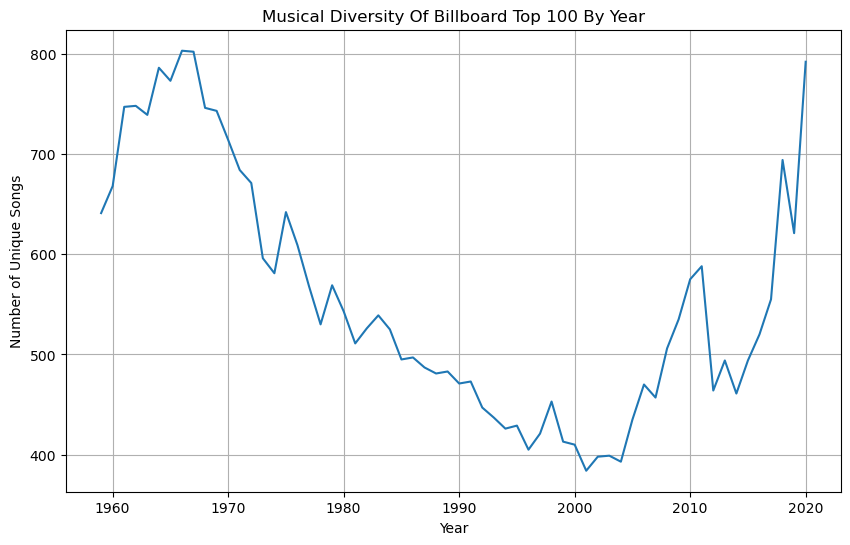

In [36]:
# Plot 
plt.figure(figsize=(10, 6))
plt.plot(musical_diversity['year'], musical_diversity['song'])
plt.title('Musical Diversity Of Billboard Top 100 By Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.grid(True)
plt.show()

#Answer: The musical diversity trend since 1960 does change over time. It decreased steadily until the 2000s, where it significantly returned to pre-1970s levels.
# There is a general trend toward increased diversity since the 2000s. This might indicate changes in how music is consumed (streaming as opposed to albums sold in stores) and the influence of digital platforms (like Spotify) on chart dynamics.


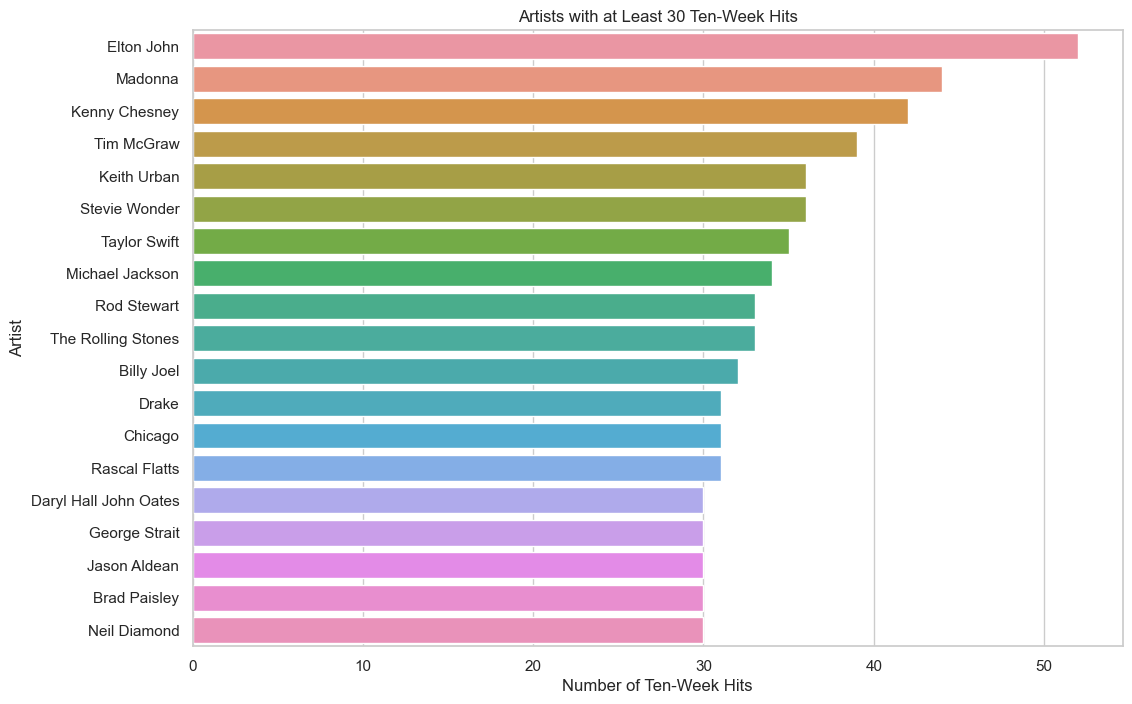

In [58]:
#Part C.

import seaborn as sns

# Group by performer and song, and count the occurrences (weeks on the chart)
song_weeks = billboard.groupby(['performer', 'song']).size().reset_index(name='weeks_on_chart')

# List 10-week hit songs
ten_week_hits = song_weeks[song_weeks['weeks_on_chart'] >= 10]

# Group by performer and count number of ten-week hit songs
artist_ten_week_hits = ten_week_hits.groupby('performer').size().reset_index(name='ten_week_hit_count')

# List performers with at least 30 ten-week hit songs
top_artists = artist_ten_week_hits[artist_ten_week_hits['ten_week_hit_count'] >= 30]

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='ten_week_hit_count', y='performer', data=top_artists.sort_values(by='ten_week_hit_count', ascending=False))
plt.title('Artists with at Least 30 Ten-Week Hits')
plt.xlabel('Number of Ten-Week Hits')
plt.ylabel('Artist')
plt.show()

#Answer: Elton John, Madonna, and Kenny Chesney had the most 10-week hits (at least 30). 

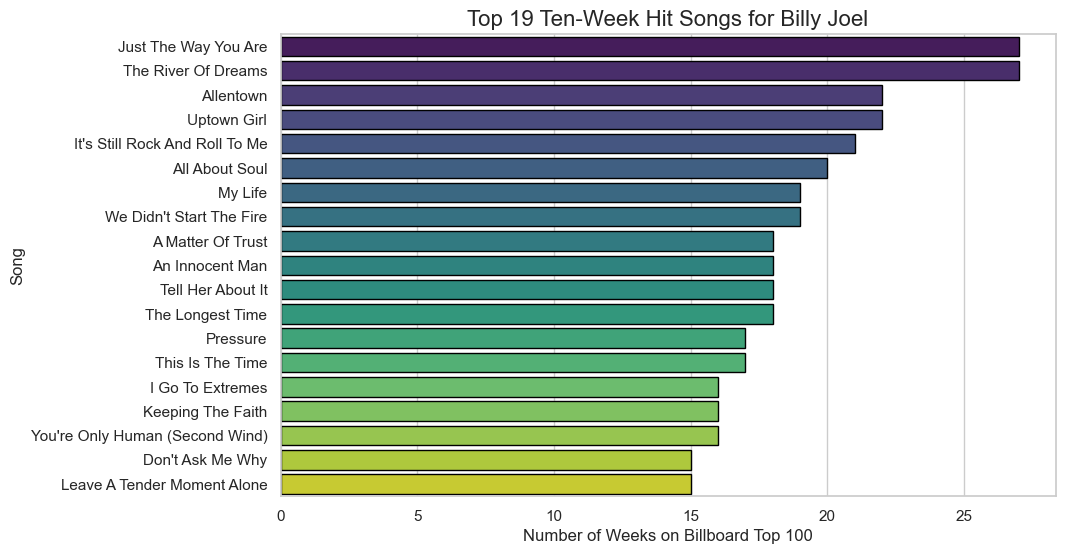

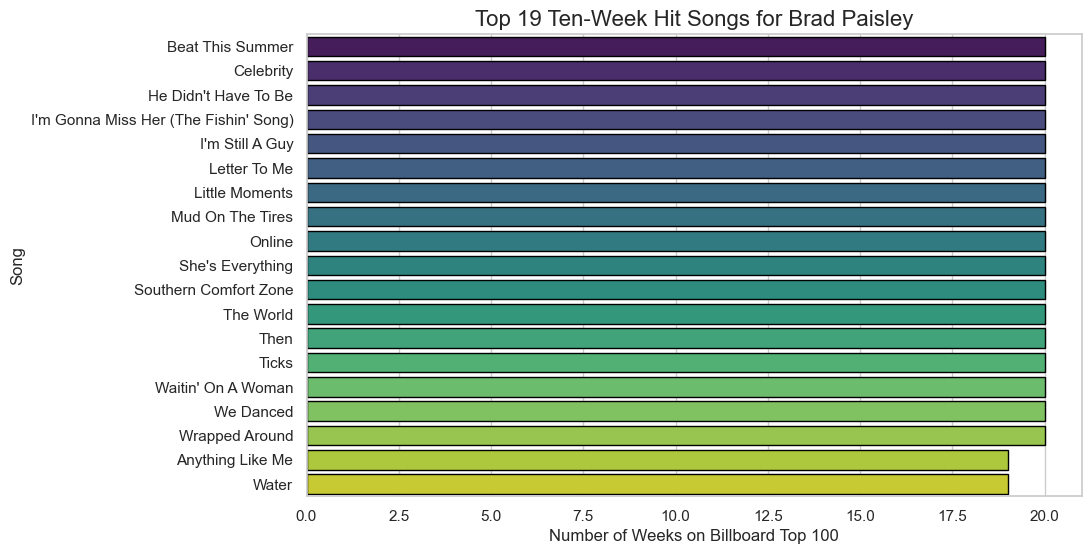

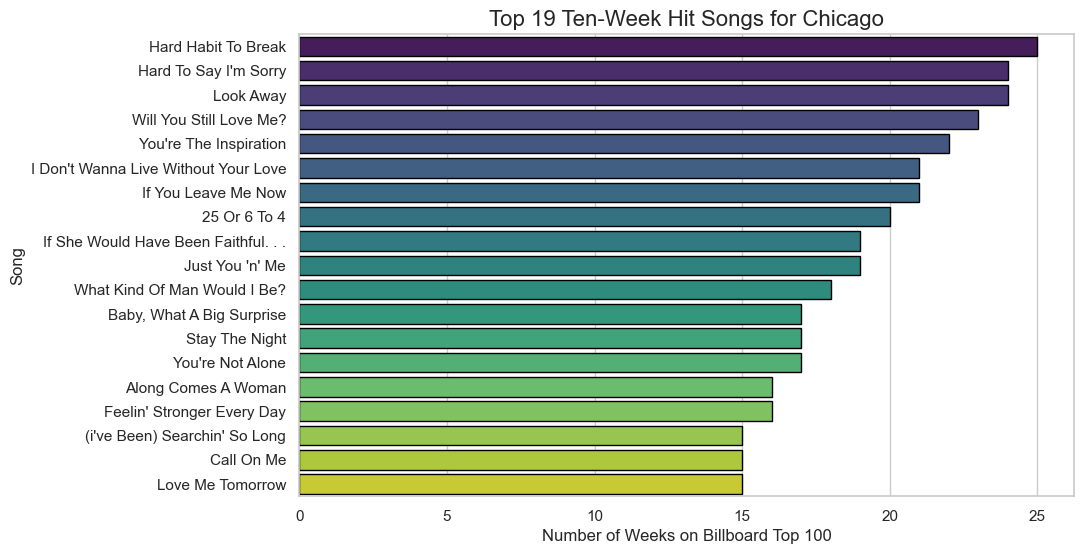

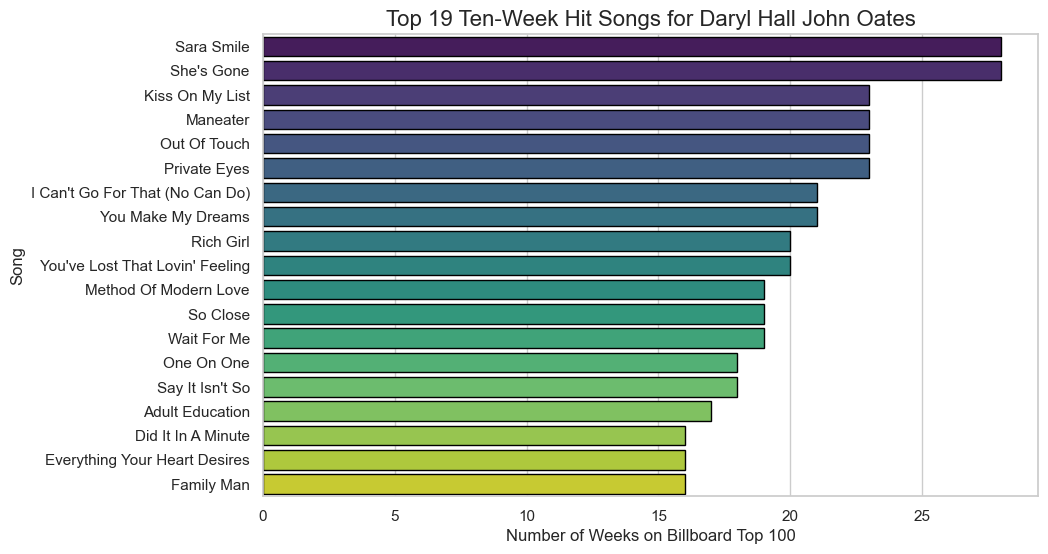

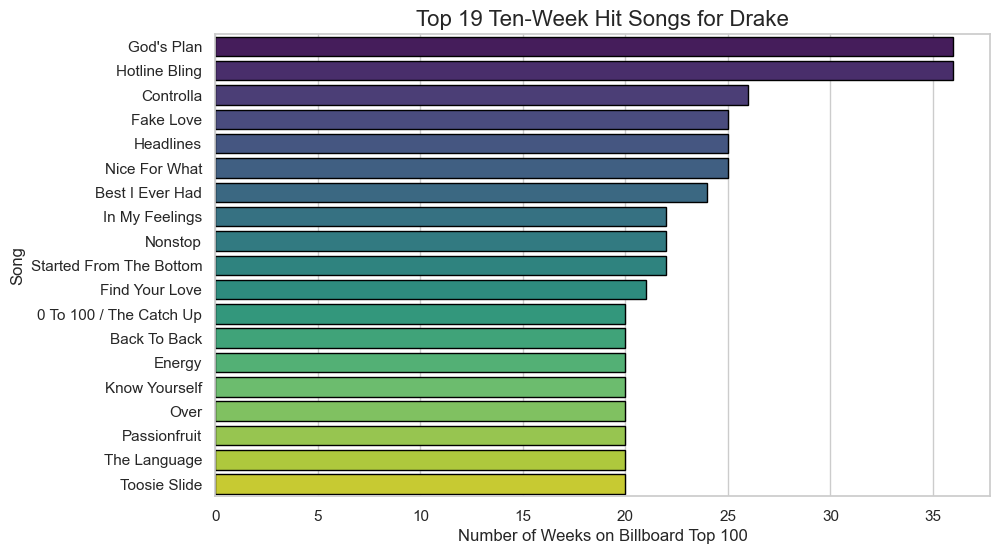

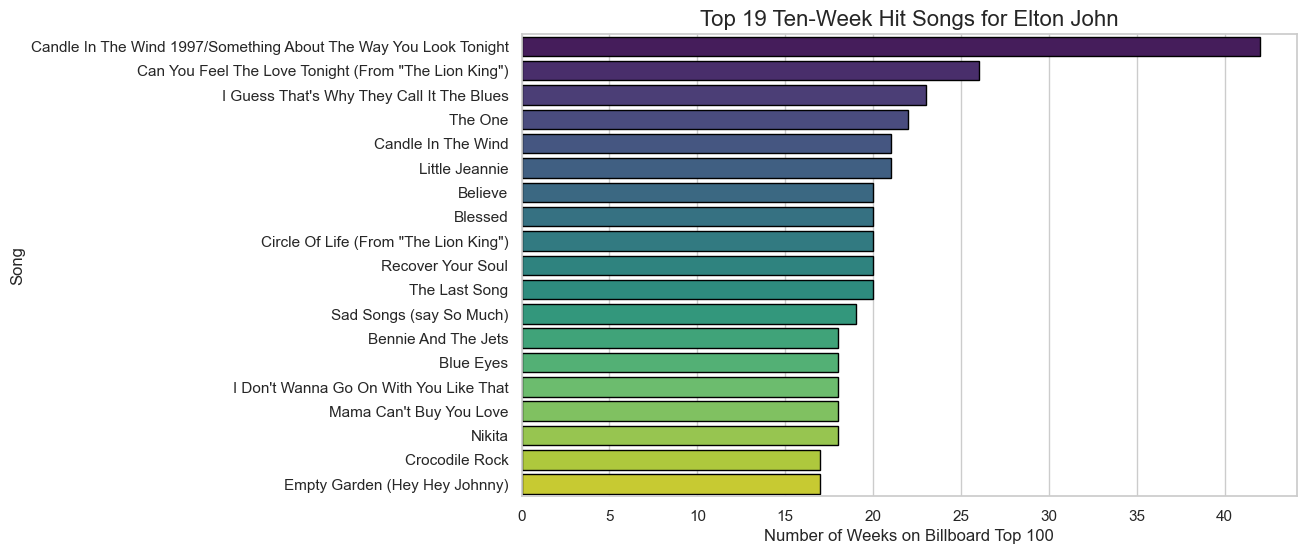

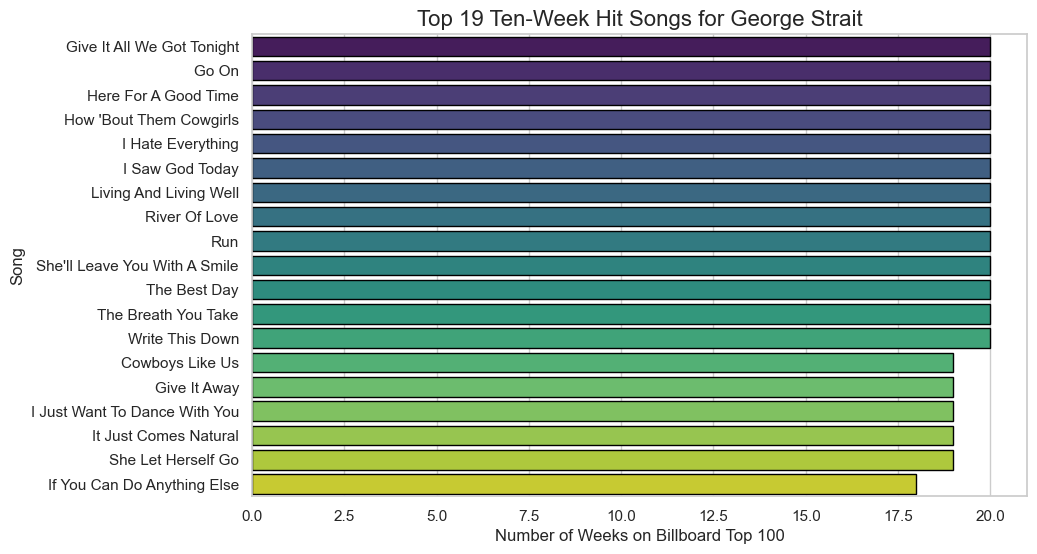

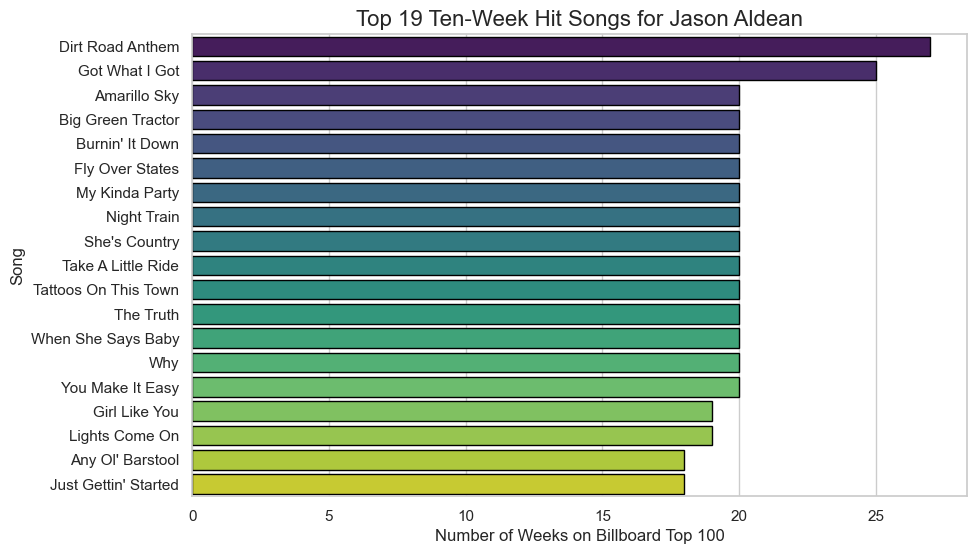

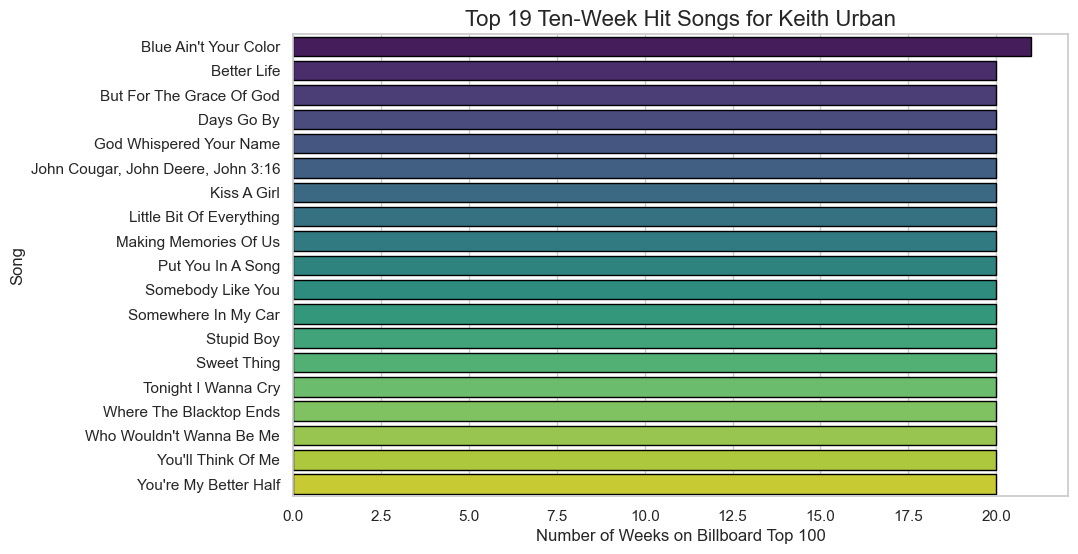

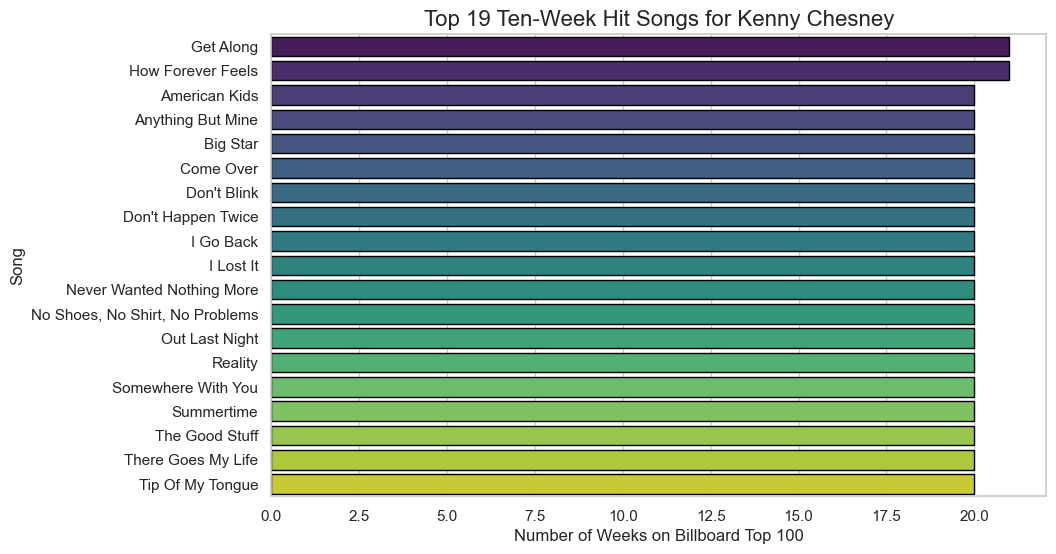

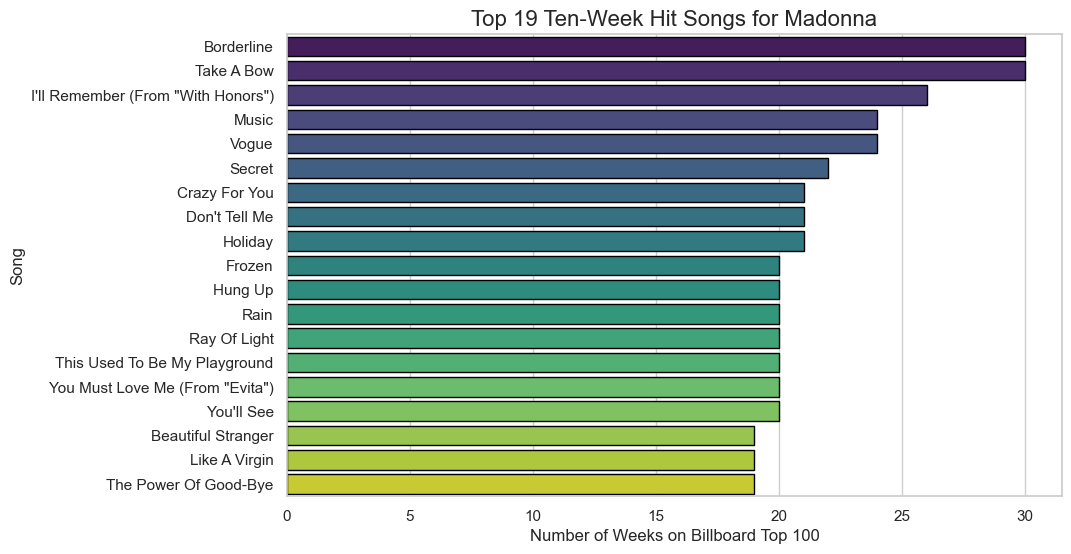

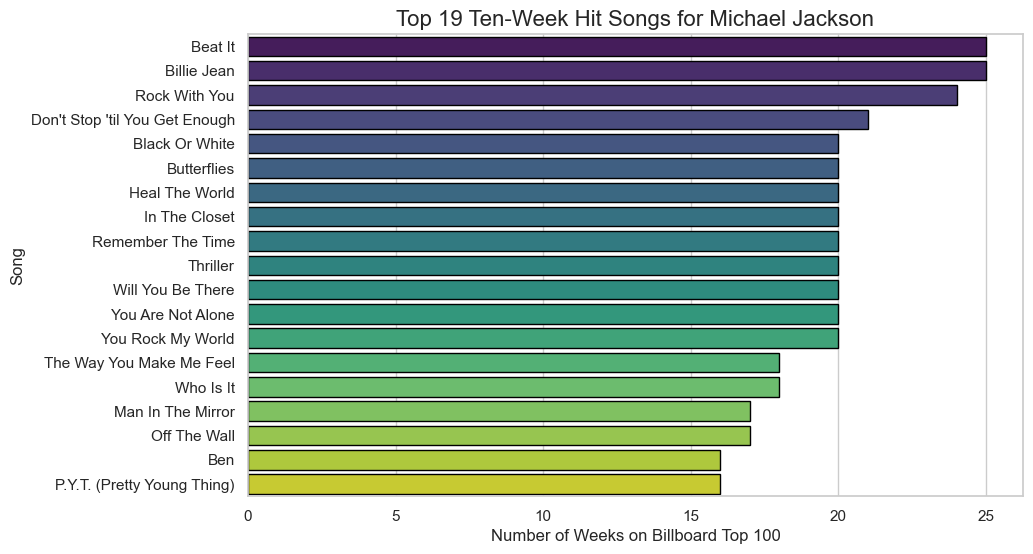

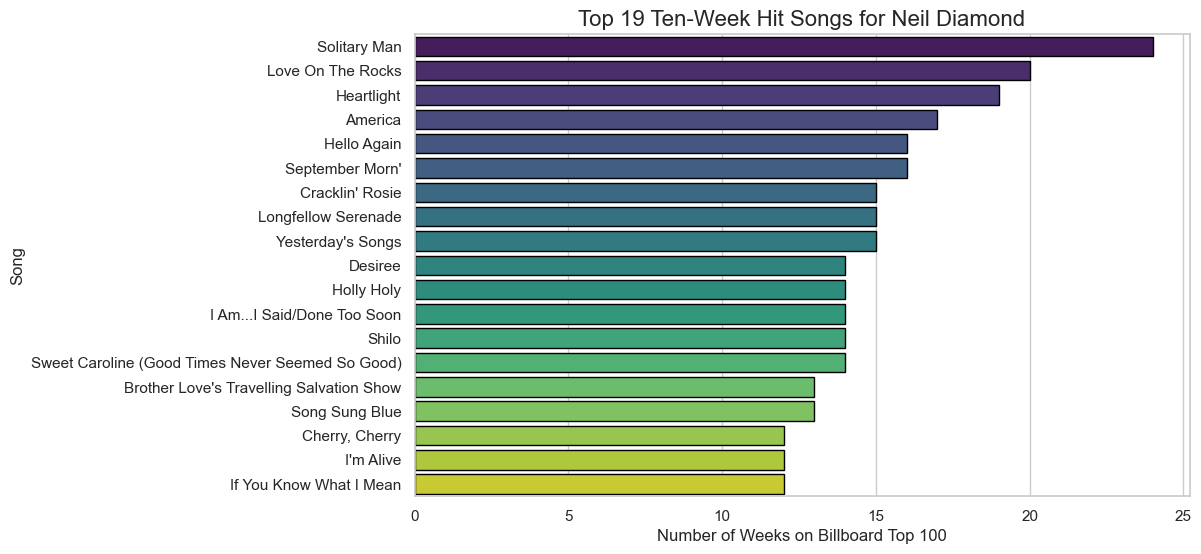

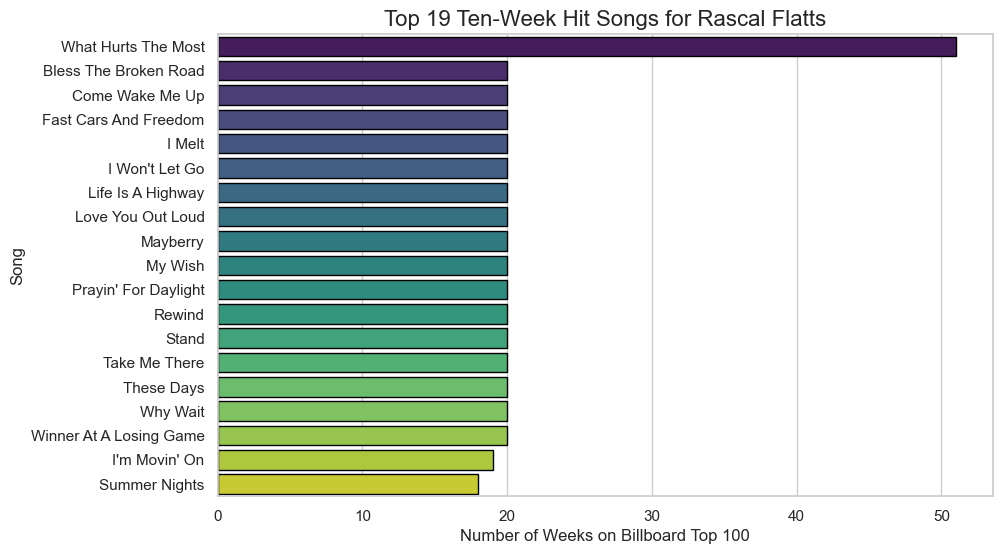

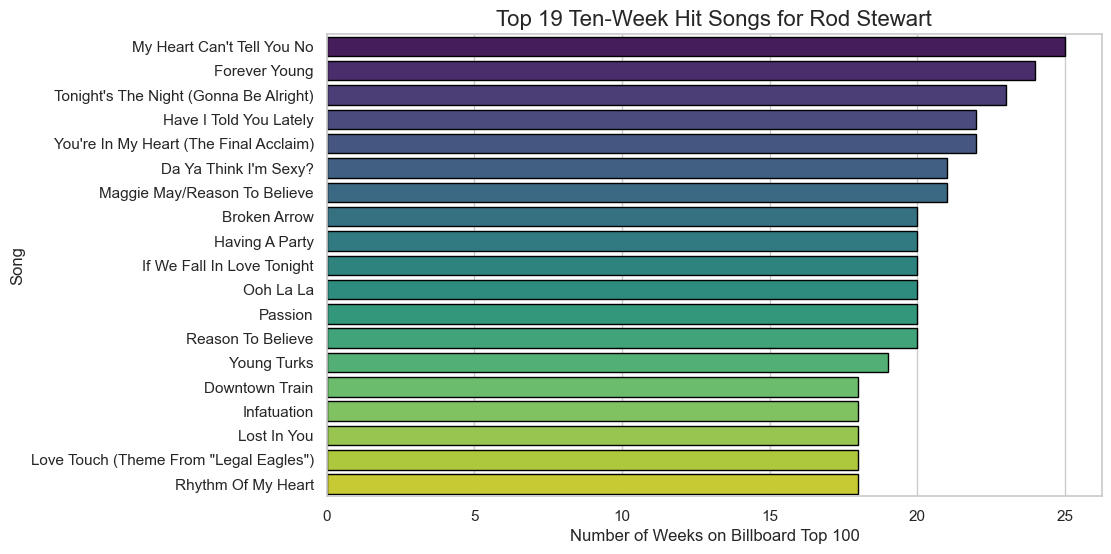

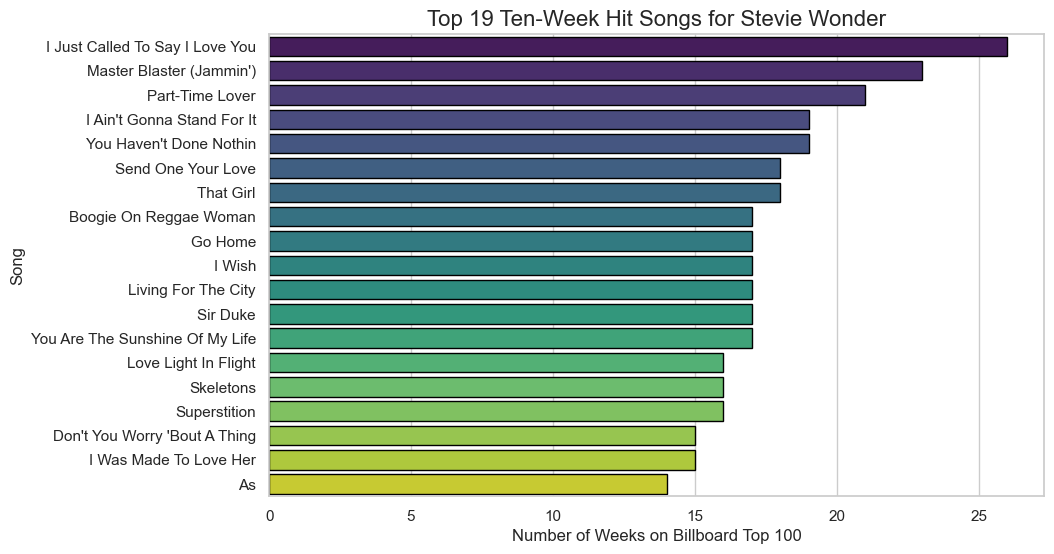

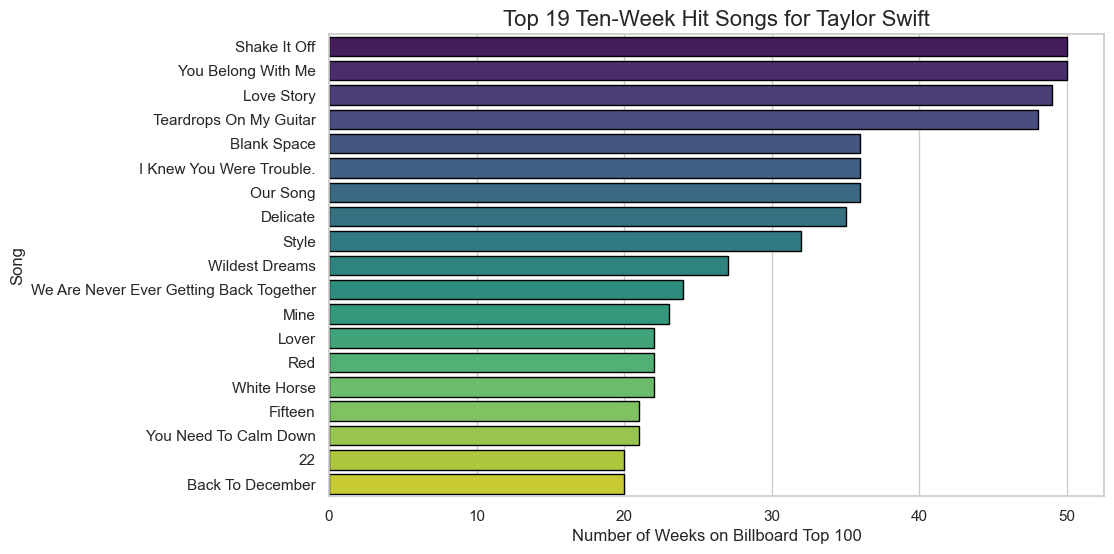

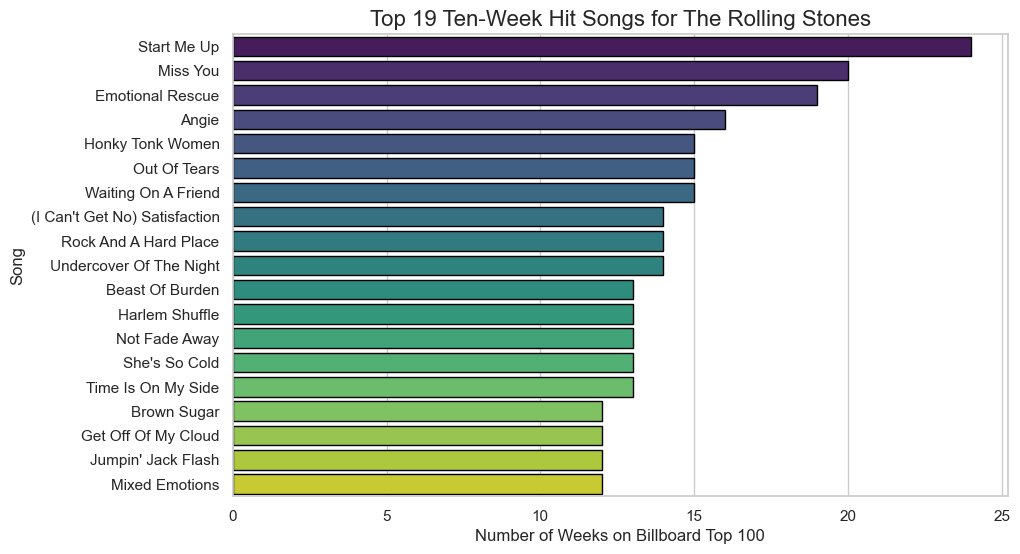

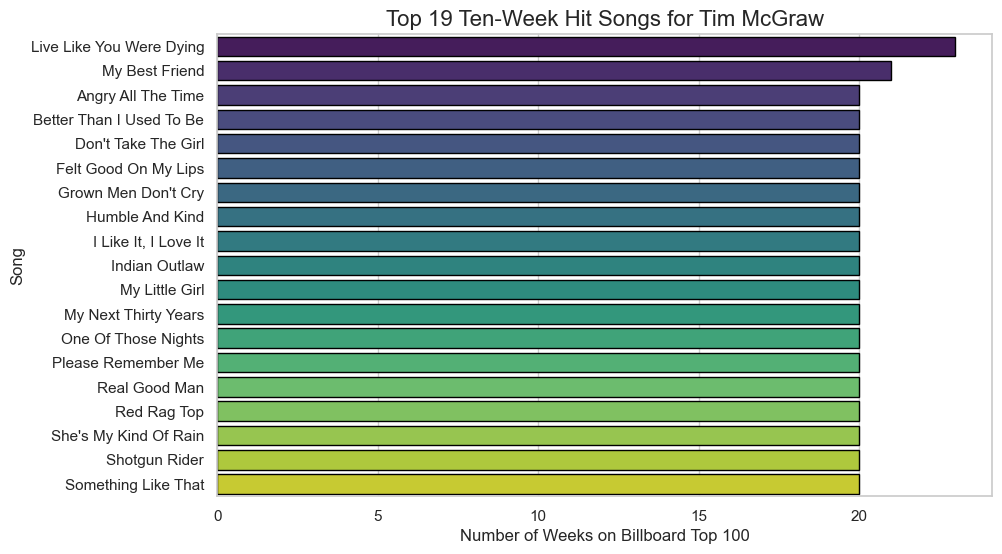

In [84]:
# Filter to get the relevant columns
billboard_data = billboard_data[['performer', 'song', 'year', 'week_position']]

# Identify "ten-week hits"
ten_week_hits = billboard_data.groupby(['performer', 'song']).filter(lambda x: len(x) >= 10)

# Count the number of ten-week hits per artist
ten_week_hits_count = ten_week_hits.groupby('performer')['song'].nunique().reset_index()
ten_week_hits_count.columns = ['performer', 'ten_week_hits']

# Filter for the top 19 artists with the most ten-week hits
top_artists = ten_week_hits_count.sort_values(by='ten_week_hits', ascending=False).head(19)

# Filter the original data for only these top 19 artists
top_artists_data = billboard_data[billboard_data['performer'].isin(top_artists['performer'])]

# Group by artist and song, then count the number of weeks each song stayed on the chart
artist_song_weeks = top_artists_data.groupby(['performer', 'song']).size().reset_index(name='weeks_on_chart')

# Sort the songs within each artist by the number of weeks on the chart
artist_song_weeks = artist_song_weeks.sort_values(by=['performer', 'weeks_on_chart'], ascending=[True, False])

# Get the top 19 songs for each top artist (19 total)
top_19_songs_per_artist = artist_song_weeks.groupby('performer').head(19).reset_index(drop=True)

# Set the style for plots
sns.set(style="whitegrid")

# Create a bar plot for each artist's top 19 ten-week hits
for artist in top_19_songs_per_artist['performer'].unique():
    plt.figure(figsize=(10, 6))
    artist_data = top_19_songs_per_artist[top_19_songs_per_artist['performer'] == artist]
    
    sns.barplot(x='weeks_on_chart', y='song', data=artist_data, palette='viridis', edgecolor='black')
    
    plt.title(f'Top 19 Ten-Week Hit Songs for {artist}', fontsize=16)
    plt.xlabel('Number of Weeks on Billboard Top 100', fontsize=12)
    plt.ylabel('Song', fontsize=12)
    plt.show()

# Caption for the plots: The following plots below show the top 10-week hit songs (19) for each of the top artists with at least 30 ten-week hits.
# Note there are 19 bar plots for each of the top 19 artists in alphabetical order. 
# The top 19 artists are: Billy Joel, Brad Paisley, Chicago, Daryl Hall John Oates, Drake, Elton John, George Strait, Jason Aldean, Keith Urban, Kenny Chesney, Madonna, Michael Jackson, Neil Diamond, Rascal Flatts, Rod Stewart, Stevie Wonder, Taylor Swift, The Rolling Stones, and Tim McGraw. 


### Visual story telling part 1: Green buildings

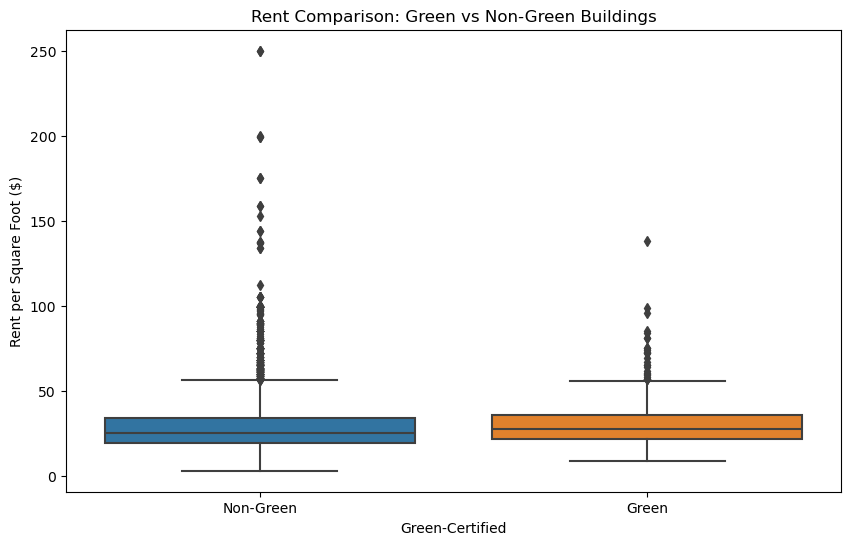

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
greenbuildings_df = pd.read_csv('greenbuildings.csv')
# Remove buildings with low occupancy rates (<5%)
df_cleaned = greenbuildings_df[greenbuildings_df['leasing_rate'] >= 0.05]

# Plot rents
plt.figure(figsize=(10, 6))
sns.boxplot(x='green_rating', y='Rent', data=df_cleaned)
plt.title('Rent Comparison: Green vs Non-Green Buildings')
plt.xlabel('Green-Certified')
plt.ylabel('Rent per Square Foot ($)')
plt.xticks([0, 1], ['Non-Green', 'Green'])
plt.show()

#The boxplots show that green-certified buildings tend to have overall higher median rents than non-green buildings.
# However, there is less variability in rent across green buildings. There may not be enouch evidence to support the conclusion to support building a "green" building. 

In [107]:
df_cleaned.groupby(['green_rating'])['Rent'].describe()

count       mean        std   min      25%   50%    75%     max
green_rating                                                                  
0             7050.0  28.414156  15.293618  2.98  19.4300  25.0  34.18  250.00
1              684.0  30.028480  12.955452  8.87  21.4975  27.6  35.54  138.07

In [109]:
greenbuildings_df.groupby(['green_rating'])['Rent'].describe()




count       mean        std   min    25%   50%   75%     max
green_rating                                                               
0             7209.0  28.266778  15.254134  2.98  19.18  25.0  34.0  250.00
1              685.0  30.016029  12.950078  8.87  21.50  27.6  35.5  138.07

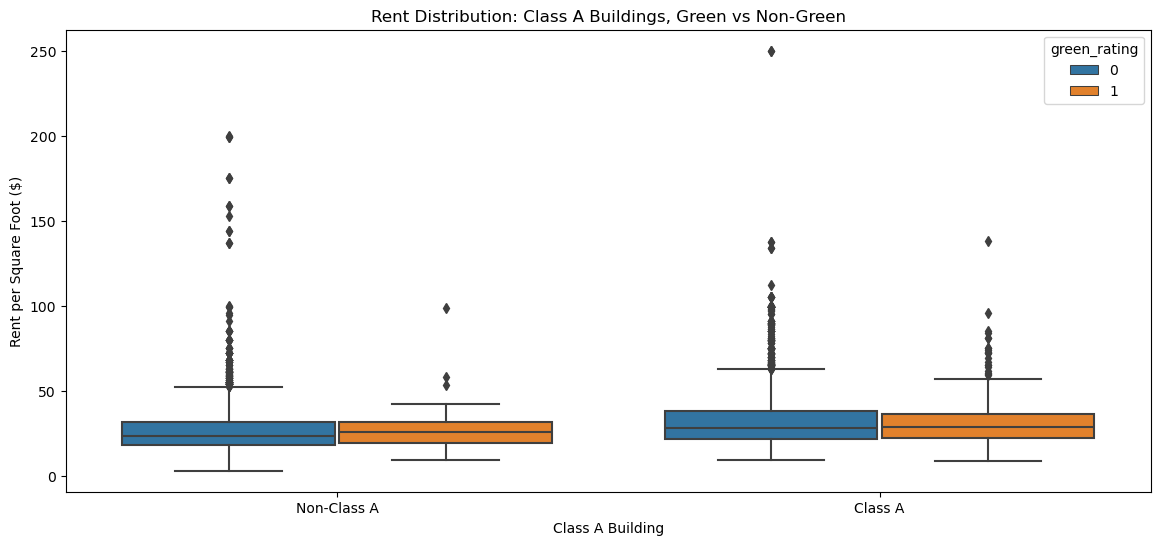

In [26]:
# Compare rents for building classes
plt.figure(figsize=(14, 6))
sns.boxplot(x='class_a', y='Rent', hue='green_rating', data=df_cleaned)
plt.title('Rent Distribution: Class A Buildings, Green vs Non-Green')
plt.xlabel('Class A Building')
plt.ylabel('Rent per Square Foot ($)')
plt.xticks([0, 1], ['Non-Class A', 'Class A'])
plt.show()

#Note the similarity of the medians in both non-Class A and Class A buildings. This can be confounding. 

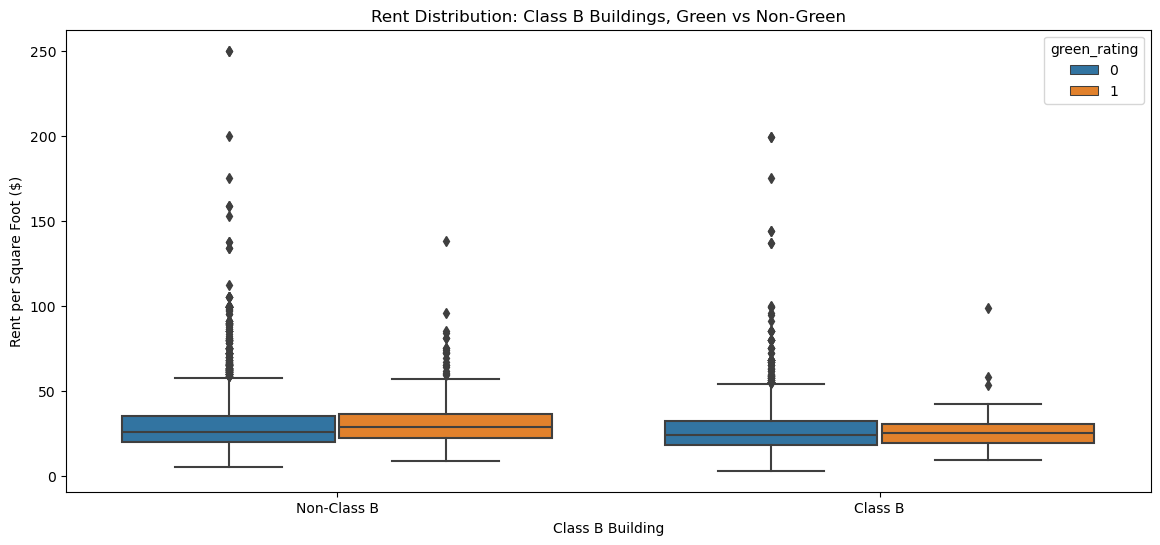

In [28]:
# Compare rents for building classes
plt.figure(figsize=(14, 6))
sns.boxplot(x='class_b', y='Rent', hue='green_rating', data=df_cleaned)
plt.title('Rent Distribution: Class B Buildings, Green vs Non-Green')
plt.xlabel('Class B Building')
plt.ylabel('Rent per Square Foot ($)')
plt.xticks([0, 1], ['Non-Class B', 'Class B'])
plt.show()

#Note the similarity of the medians in both non-Class B and Class B buildings. This can be confounding.

/var/folders/_p/jlgnbnws20x5z3qr4hcn9p840000gn/T/ipykernel_63723/3514163095.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = df_cleaned[(greenbuildings_df['age'] > 10) & (df_cleaned['age'] < 50)]


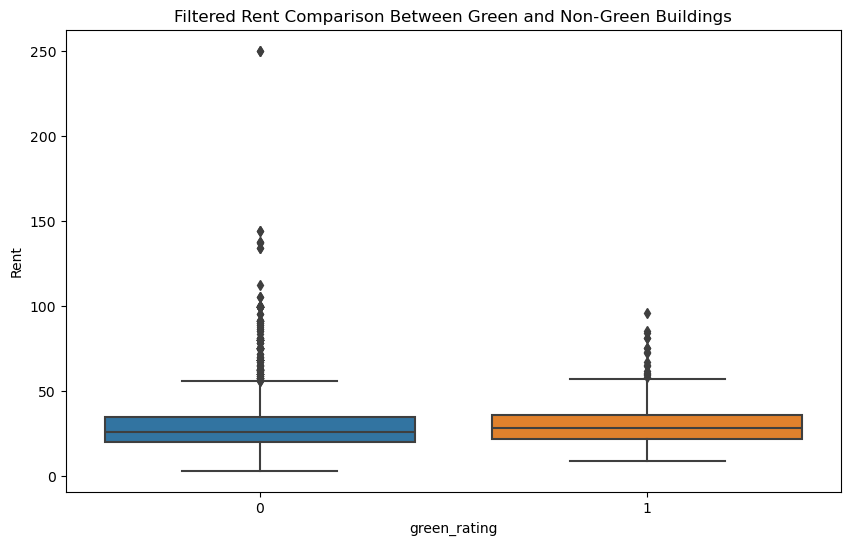

In [30]:
# If green buildings tend to be newer or in better locations, filter the data to control for these factors and compare rents again.

filtered_data = df_cleaned[(greenbuildings_df['age'] > 10) & (df_cleaned['age'] < 50)]

# Boxplot for filtered data
plt.figure(figsize=(10, 6))
sns.boxplot(x='green_rating', y='Rent', data=filtered_data)
plt.title('Filtered Rent Comparison Between Green and Non-Green Buildings')
plt.show()

# Answer: This plot shows that even after filtering, there still isn't much difference between the median in rent for green and non-green buildings. 
# This corroborates confounding factors, such as the size of building, age of building, class of building, leasing rates, and renovation status. 
# Larger buildings might offer more amenities, leading to naturally higher rent.
# Higher occupancy rates may influence rent. The "guru" initially excluded buildings with low occupancy, but this could be misleading.
# The classification of a building can influence rent, such as whether a building is green or not.A building that is green may belong to a certain building class.
# Newer buildings tend to have higher rents due to modern amenities and infrastructure. If green buildings are generally newer, age could confound the relationship.
# Buildings that are renovated may naturally command higher rents.
# In conclusion, the developer is right (and the Excel guru is wrong). 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


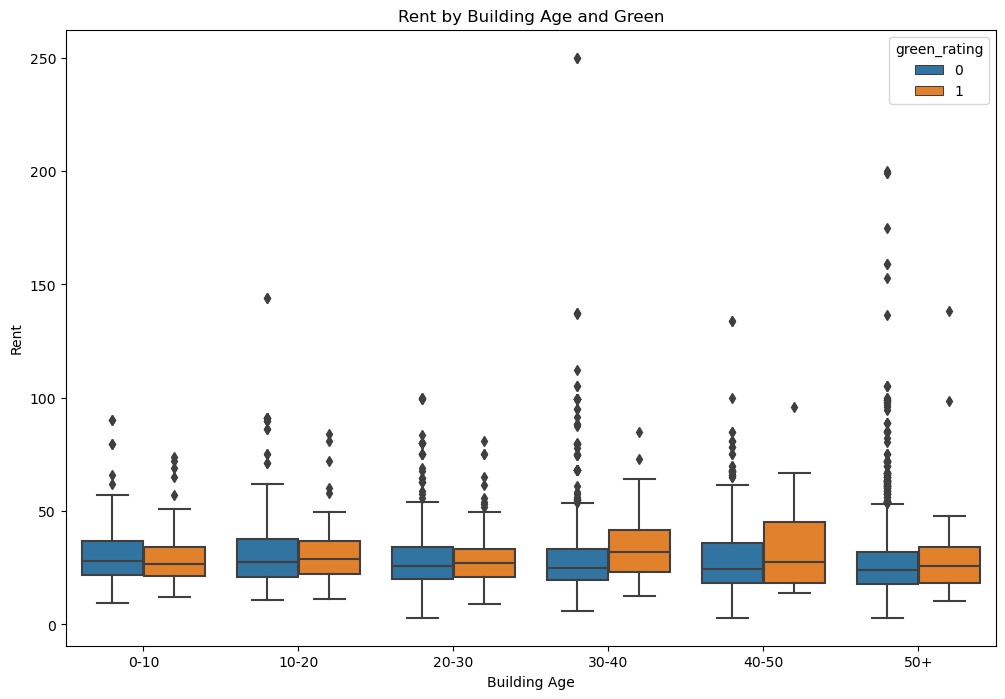

In [32]:
# Box plot: Rent comparison between Green and Non-Green buildings, controlling for Age Group
greenbuildings_df['age_group'] = pd.cut(greenbuildings_df['age'], bins=[0, 10, 20, 30, 40, 50, 100], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50+'])

plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='Rent', hue='green_rating', data=greenbuildings_df)
plt.title('Rent by Building Age and Green')
plt.xlabel('Building Age')
plt.ylabel('Rent')
plt.show()

#Answer: To adjust for confounding factors, we can utilize a binning approach comparing age groups of green vs. non-green buildings. 




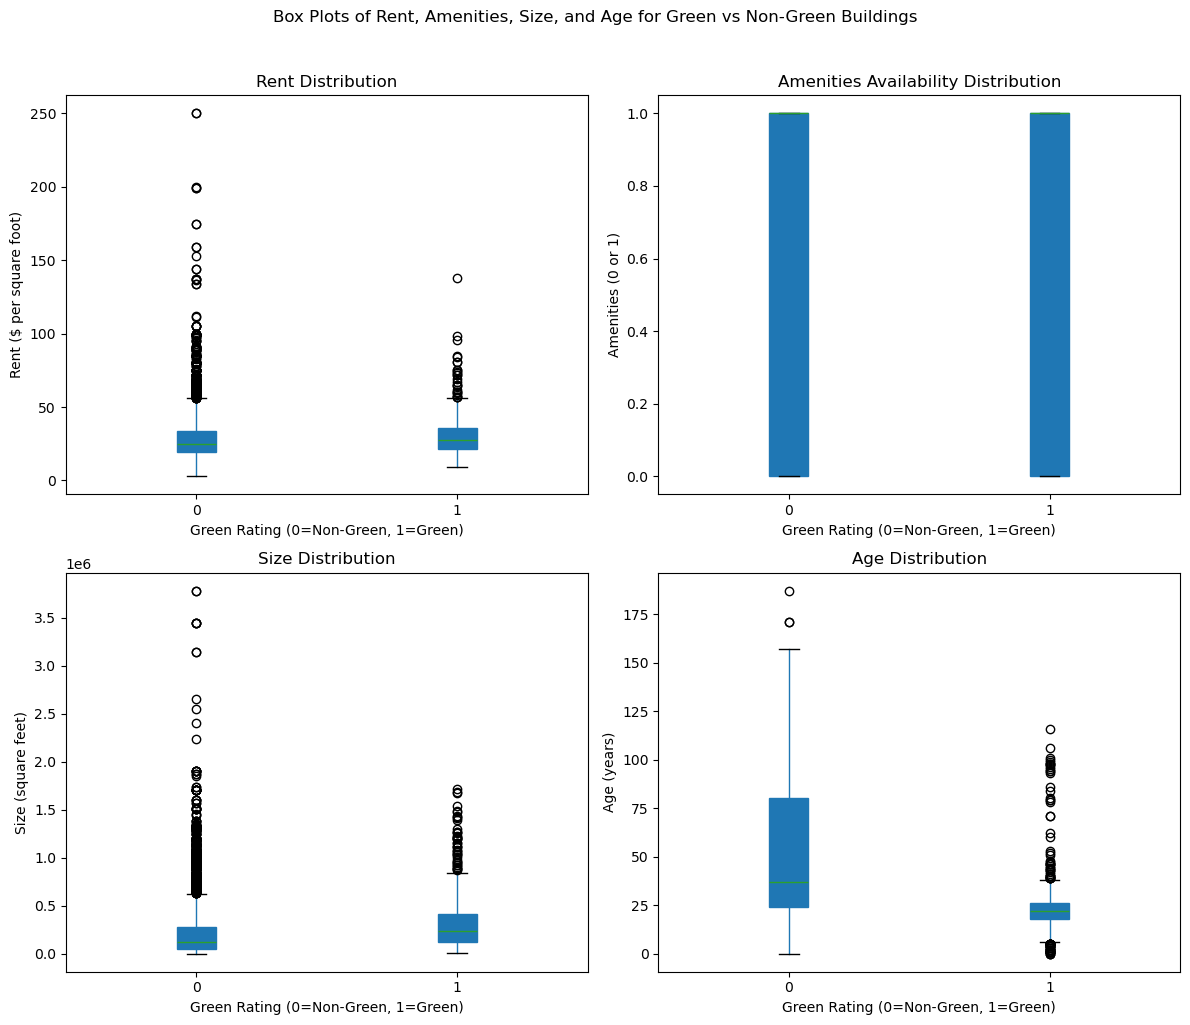

In [34]:
# Creating box plots for Rent, Amenities, Size, and Age for green vs non-green buildings
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Rent
greenbuildings_df.boxplot(column='Rent', by='green_rating', ax=axes[0, 0], patch_artist=True, grid=False)
axes[0, 0].set_title('Rent Distribution')
axes[0, 0].set_xlabel('Green Rating (0=Non-Green, 1=Green)')
axes[0, 0].set_ylabel('Rent ($ per square foot)')

# Amenities
greenbuildings_df.boxplot(column='amenities', by='green_rating', ax=axes[0, 1], patch_artist=True, grid=False)
axes[0, 1].set_title('Amenities Availability Distribution')
axes[0, 1].set_xlabel('Green Rating (0=Non-Green, 1=Green)')
axes[0, 1].set_ylabel('Amenities (0 or 1)')

# Size
greenbuildings_df.boxplot(column='size', by='green_rating', ax=axes[1, 0], patch_artist=True, grid=False)
axes[1, 0].set_title('Size Distribution')
axes[1, 0].set_xlabel('Green Rating (0=Non-Green, 1=Green)')
axes[1, 0].set_ylabel('Size (square feet)')

# Age
greenbuildings_df.boxplot(column='age', by='green_rating', ax=axes[1, 1], patch_artist=True, grid=False)
axes[1, 1].set_title('Age Distribution')
axes[1, 1].set_xlabel('Green Rating (0=Non-Green, 1=Green)')
axes[1, 1].set_ylabel('Age (years)')

# Adjust layout
plt.suptitle('Box Plots of Rent, Amenities, Size, and Age for Green vs Non-Green Buildings', y=1.02)
plt.tight_layout()
plt.show()

# Answer: Box plots can compare the distribution of rents between green and non-green buildings, while controlling for other variables by using different subgroups (e.g., buildings of similar age). Plots also show that data is also skewed (meaning low variability among green buildings). 
# Recommendation: Instead of just looking at median rents, also consider the distribution of rents and look at other descriptive statistics like mean, standard deviation, and percentiles. Using the median is misleading. 
# To check if the distribution of rents for green buildings is consistently higher within similar building groups (such as age, size, renovation status, etc), we can also segment the data into groups (such as age) and then compare the distributions of rent within these groups. 

In [36]:
# We will create 5 bins by specifying the number of bins
greenbuildings_df['Rent_Bins'] = pd.cut(greenbuildings_df['Rent'], bins=5)

# Display the first few rows to check the binning
print(greenbuildings_df[['Rent', 'Rent_Bins']].head())

    Rent        Rent_Bins
0  38.56  (2.733, 52.384]
1  28.57  (2.733, 52.384]
2  33.31  (2.733, 52.384]
3  35.00  (2.733, 52.384]
4  40.69  (2.733, 52.384]


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


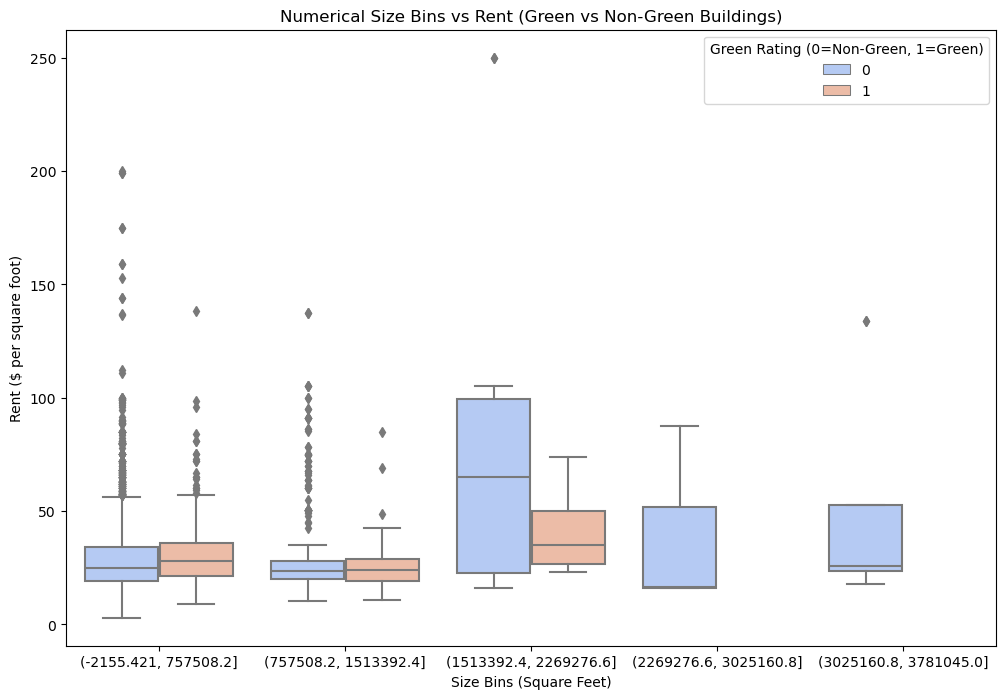

In [40]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create numerical bins for size
greenbuildings_df['Size_Bins'] = pd.cut(greenbuildings_df['size'], bins=5)

# Plot numerical size bins against rent for green and non-green buildings
plt.figure(figsize=(12, 8))
sns.boxplot(x='Size_Bins', y='Rent', hue='green_rating', data=greenbuildings_df, palette='coolwarm')

plt.title('Numerical Size Bins vs Rent (Green vs Non-Green Buildings)')
plt.xlabel('Size Bins (Square Feet)')
plt.ylabel('Rent ($ per square foot)')
plt.legend(title='Green Rating (0=Non-Green, 1=Green)')
plt.show()

#Answer: This plot comparing size vs. rent for green vs. non-green buildings shows that the rent distribution for the size of green buildings is smaller compared to non-green buildings. 
# Building size could be a confounding factor in this analysis, meaning the data is skewed. 
# This is further evidence that rent for green buildings is high regardless of building size. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


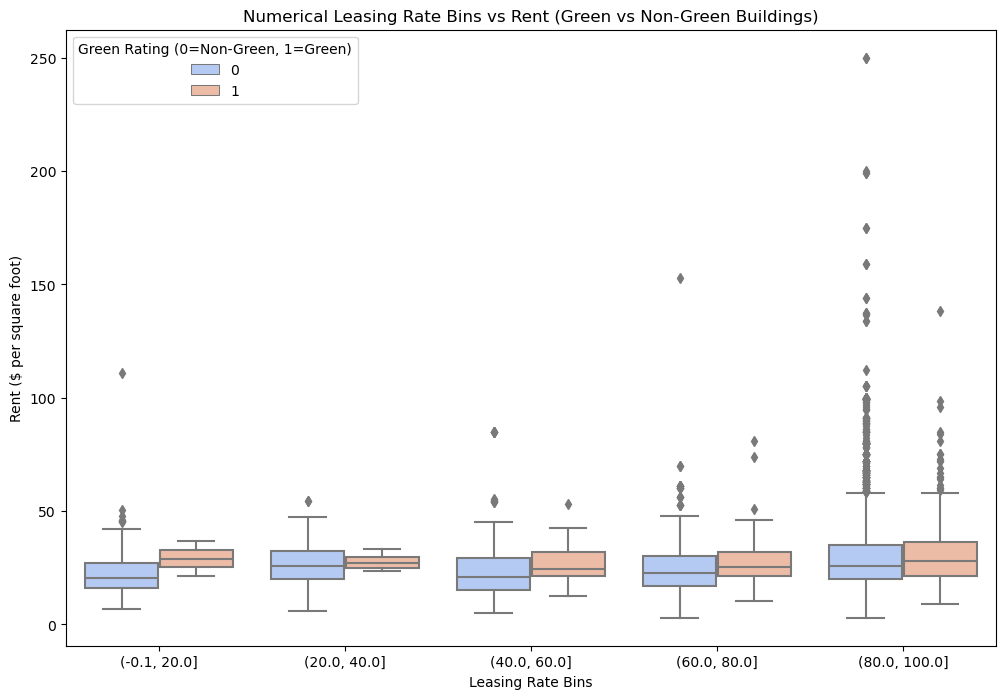

In [44]:
# Create numerical bins for leasing_rate
greenbuildings_df['Leasing_Rate_Bins'] = pd.cut(greenbuildings_df['leasing_rate'], bins=5)

# Plot numerical leasing_rate bins against rent for green and non-green buildings
plt.figure(figsize=(12, 8))
sns.boxplot(x='Leasing_Rate_Bins', y='Rent', hue='green_rating', data=greenbuildings_df, palette='coolwarm')

plt.title('Numerical Leasing Rate Bins vs Rent (Green vs Non-Green Buildings)')
plt.xlabel('Leasing Rate Bins')
plt.ylabel('Rent ($ per square foot)')
plt.legend(title='Green Rating (0=Non-Green, 1=Green)')
plt.show()

#Answer: This plot compares the rent distribution across leasing rates for green vs. non-green buildings.
# Occupancy rates appear to be higher for green buildings than non-green buildings. 
# This is additional evidence that occupancy rates can be adjusted for analysis purposes.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


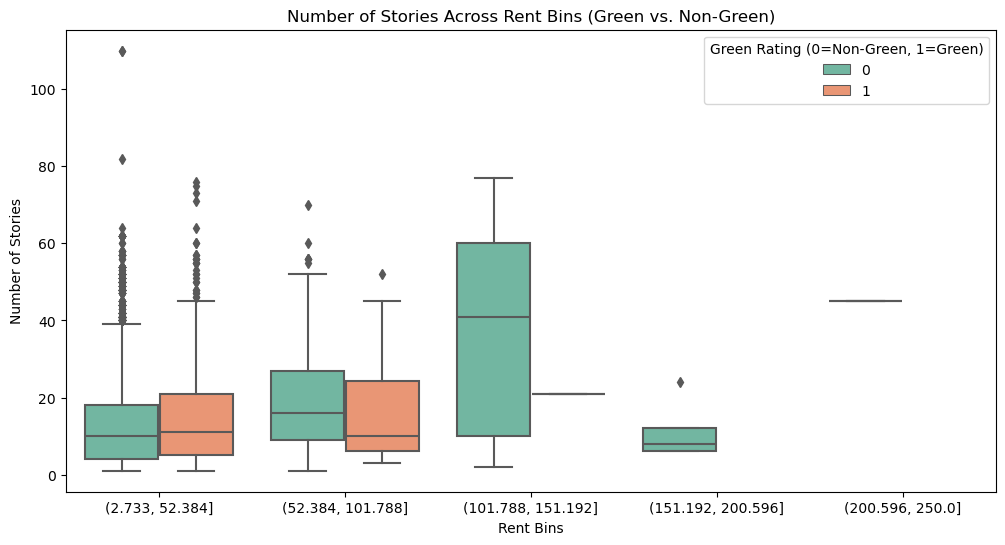

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rent_Bins', y='stories', hue='green_rating', data=greenbuildings_df, palette="Set2")
plt.title('Number of Stories Across Rent Bins (Green vs. Non-Green)')
plt.xlabel('Rent Bins')
plt.ylabel('Number of Stories')
plt.legend(title='Green Rating (0=Non-Green, 1=Green)')
plt.show()

# Answer: This plot compares the rent distribution across number of stories (height of building) for green and non-green buildings.
# Recommend using the rent bins [2.733-52,384] (lowest rent range) and [52.384-101.788] to do further analysis.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


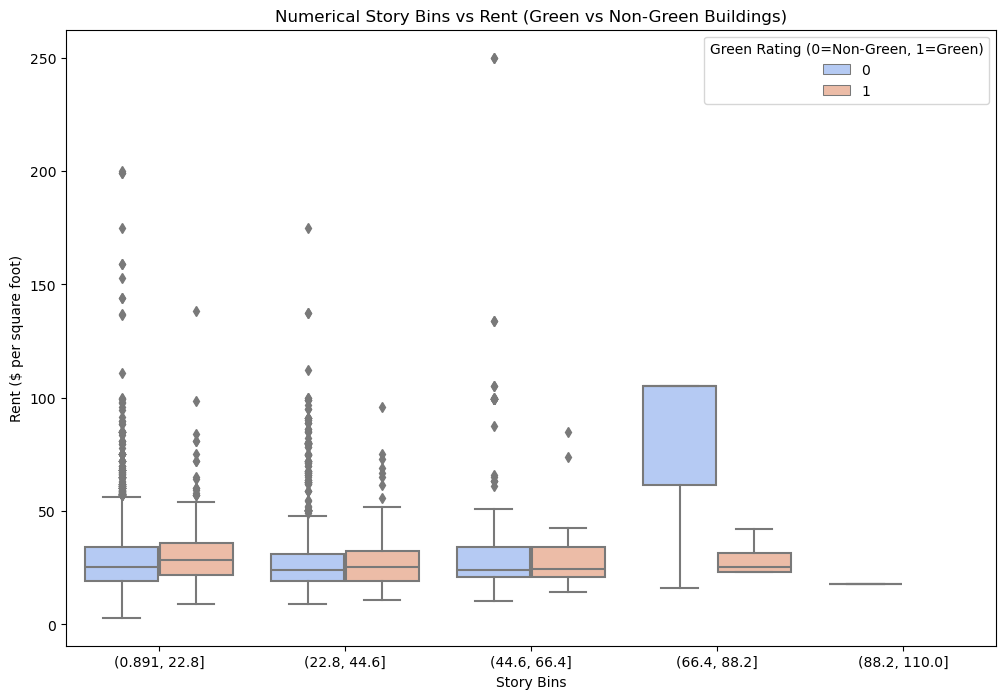

In [48]:
greenbuildings_df['Stories_Bins'] = pd.cut(greenbuildings_df['stories'], bins=5)

# Plot numerical story bins against rent for green and non-green buildings
plt.figure(figsize=(12, 8))
sns.boxplot(x='Stories_Bins', y='Rent', hue='green_rating', data=greenbuildings_df, palette='coolwarm')

plt.title('Numerical Story Bins vs Rent (Green vs Non-Green Buildings)')
plt.xlabel('Story Bins')
plt.ylabel('Rent ($ per square foot)')
plt.legend(title='Green Rating (0=Non-Green, 1=Green)')
plt.show()

# Answer: This plot shows the rent distribution across building age for green and non-green buildings.
# Looking at story, note that the rent distribution for green buildings across all bins (number of stories) has no difference. 
# Number of stories is a confounding factor, which does not explain rent should be higher for green buildings.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


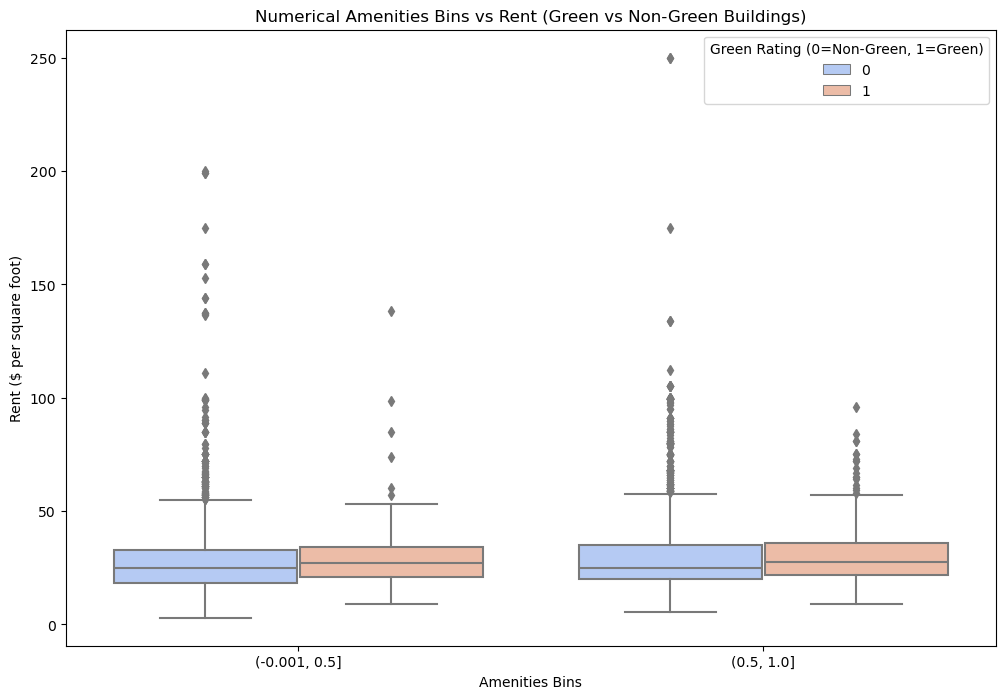

In [54]:
greenbuildings_df['Amenities_Bins'] = pd.cut(greenbuildings_df['amenities'], bins=2)

# Plot numerical amenities bins against rent for green and non-green buildings
plt.figure(figsize=(12, 8))
sns.boxplot(x='Amenities_Bins', y='Rent', hue='green_rating', data=greenbuildings_df, palette='coolwarm')

plt.title('Numerical Amenities Bins vs Rent (Green vs Non-Green Buildings)')
plt.xlabel('Amenities Bins')
plt.ylabel('Rent ($ per square foot)')
plt.legend(title='Green Rating (0=Non-Green, 1=Green)')
plt.show()

# Answer: This plot shows the rent distribution for green and non-green buildings with both amenities.
# Note the higher distribution of green buildings with amenities, compared for non-green buildings.
# Consider adjusting for the 'Amenities' variable in an analysis, which could contribute to skewing overall data. 

### Visual story telling part 2: Capital Metro data

In [119]:
import pandas as pd

# Load the dataset
data = pd.read_csv('capmetro_UT.csv')

# Check for missing values
data.isnull().sum()

timestamp      0
boarding       0
alighting      0
day_of_week    0
temperature    0
hour_of_day    0
month          0
weekend        0
dtype: int64

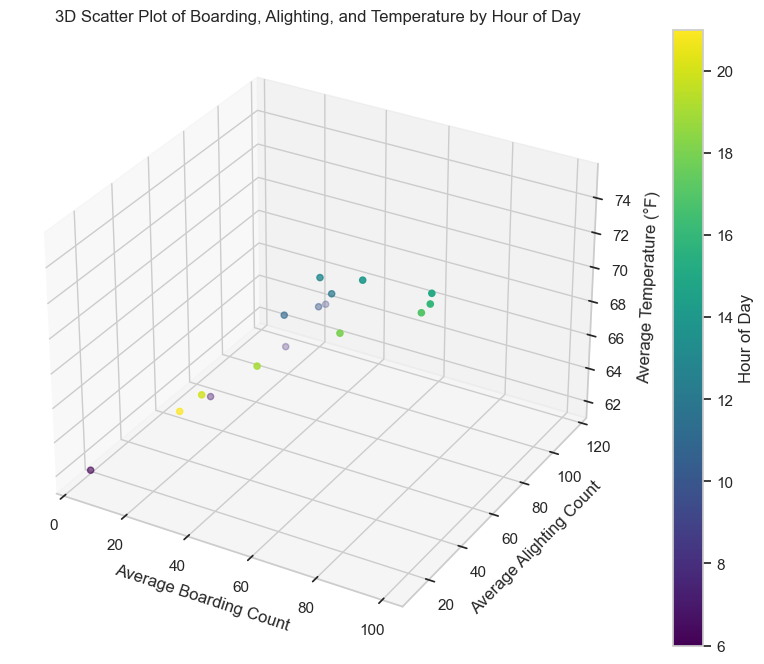

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the data
data = pd.read_csv('capmetro_UT.csv')

# Group data by hour of day and calculate mean
hourly_data = data.groupby(['hour_of_day']).agg({
    'boarding': 'mean',
    'alighting': 'mean',
    'temperature': 'mean'
}).reset_index()

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color indicating time of day
scat = ax.scatter(hourly_data['boarding'], hourly_data['alighting'], hourly_data['temperature'], 
                  c=hourly_data['hour_of_day'], cmap='viridis',)

# Labels
ax.set_xlabel('Average Boarding Count')
ax.set_ylabel('Average Alighting Count')
ax.set_zlabel('Average Temperature (°F)')

# Title and Color Bar
plt.title('3D Scatter Plot of Boarding, Alighting, and Temperature by Hour of Day')
cbar = plt.colorbar(scat)
cbar.set_label('Hour of Day')

plt.show()

# Answer: Temperatures and hour of day directly affects average boarding count. 
# People are more likely to take the bus at lower temperatures when it's cooler (makes sense as they have to wait outdoors before boarding the bus).
# Higher temperatures result in both decrease in boarding and alighting counts throughout the day. 


In [123]:
# Calculate the average boarding and alighting per hour and day
agg_data = data.groupby(['day_of_week', 'hour_of_day']).agg({
    'boarding': 'mean',
    'alighting': 'mean',
    'temperature': 'mean'
}).reset_index()

<Figure size 2500x800 with 0 Axes>

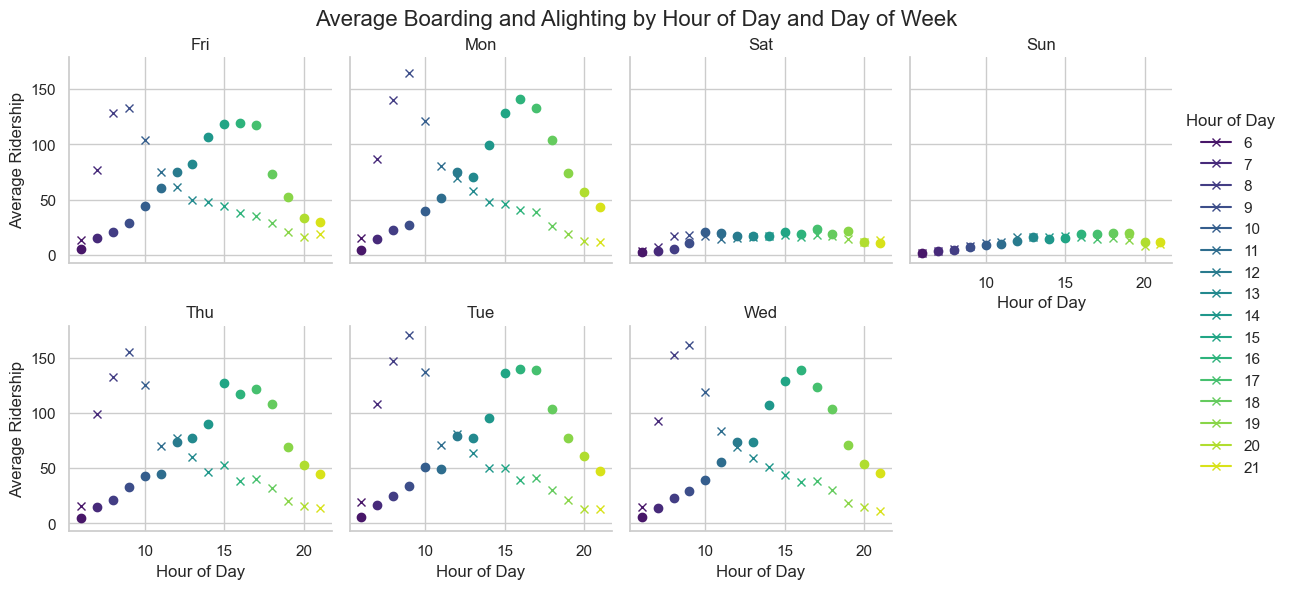

In [125]:


# Create a facet grid to show the relationship between hour of day, day of week, and ridership
plt.figure(figsize=(25, 8))
sns.set(style="whitegrid")

g = sns.FacetGrid(agg_data, col="day_of_week", hue="hour_of_day", col_wrap=4, height=3, palette="viridis")
g.map(plt.plot, "hour_of_day", "boarding", marker="o")
g.map(plt.plot, "hour_of_day", "alighting", marker="x")

# Add titles and labels
g.set_axis_labels("Hour of Day", "Average Ridership")
g.set_titles("{col_name}")
g.add_legend(title="Hour of Day")
plt.suptitle('Average Boarding and Alighting by Hour of Day and Day of Week', fontsize=16)
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()

#Answer: This is a faceting plot that shows average boarding and alighting times by hour of day and day of week.
# Riders are more likely to board weekdays at cooler temperatures throughout the day and evenings (as temperature rises throughout the day).
# There is a flatter distribution curve during weekends, implying lack of ridership throughout the hours on Saturdays/Sundays.


### Clustering and dimensionality reduction

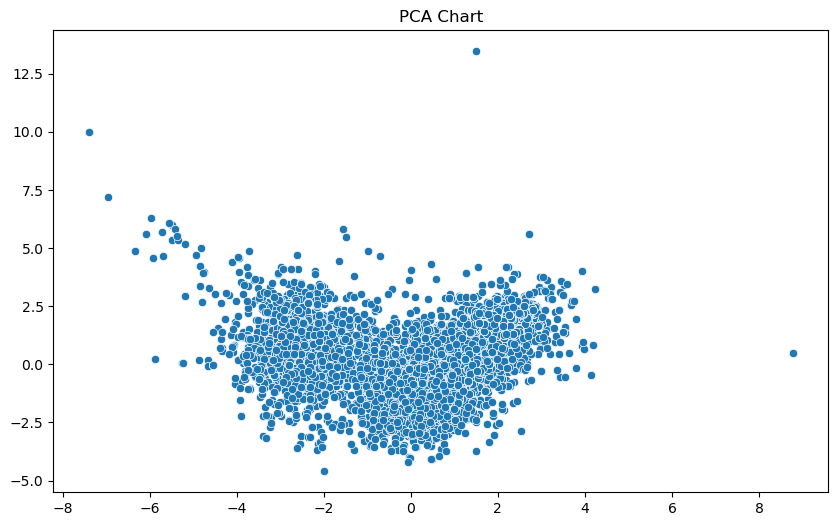

Explained variance ratio: [0.2754426  0.22671146]


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Read csv
df = pd.read_csv('wine.csv')
df_wine = df.drop(columns=['quality', 'color'])
scaler = StandardScaler()
scaled_wine = scaler.fit_transform(df_wine)

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_wine)

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1])
plt.title('PCA Chart')
plt.show()

# Check explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

#Answer: This PCA plot does not show any differentiation between wine color or quality. 

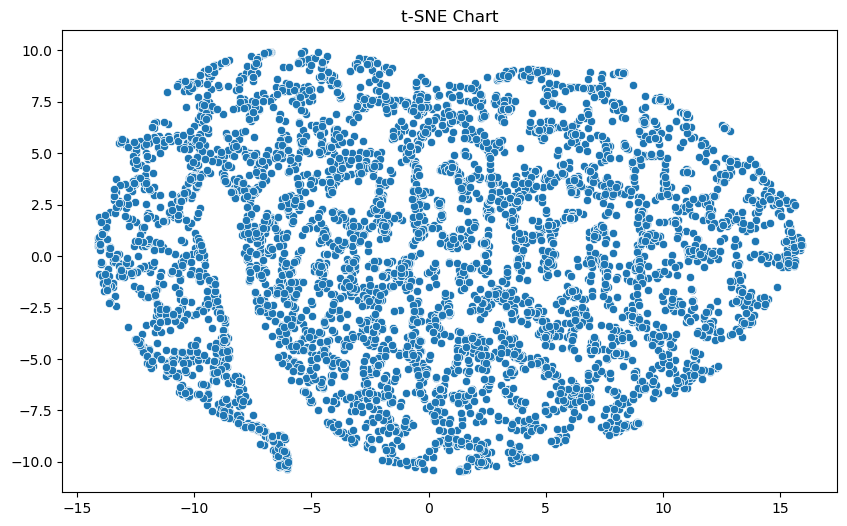

In [11]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(df_wine)

# Plot t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1])
plt.title('t-SNE Chart')
plt.show()

#Answer: This t-SNE plot does not show any differentiation between wine color or quality. 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


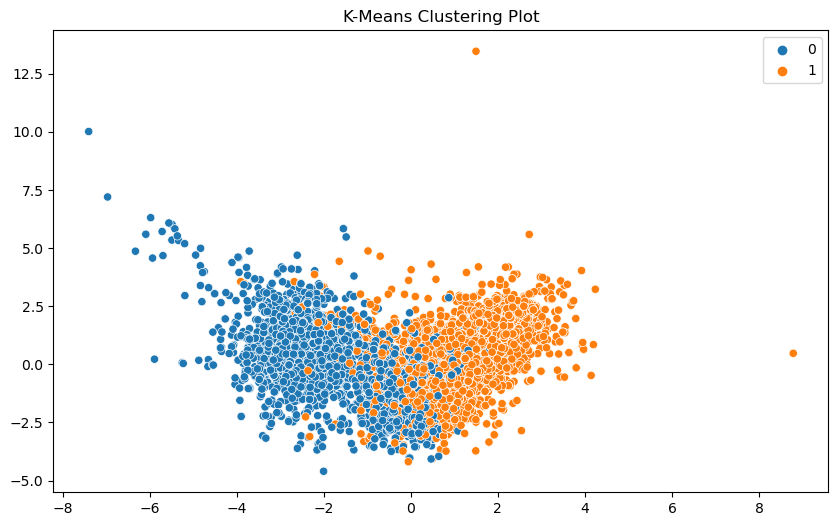

In [17]:
from sklearn.cluster import KMeans

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(df_wine)

# Plot results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=kmeans_labels)
plt.title('K-Means Clustering Plot')
plt.show()

#Answer: This K-Means Clustering plot is the best model that is able to distinguish color of wine (red vs. white), compared to PCA and T-SNE (not necessarily the wine quality).
# K-Means is the best reduction technique that makes the most sense for this data.

### Market Segmentation

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('social_marketing.csv')

In [184]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0          0
chatter             0
current_events      0
travel              0
photo_sharing       0
uncategorized       0
tv_film             0
sports_fandom       0
politics            0
food                0
family              0
home_and_garden     0
music               0
news                0
online_gaming       0
shopping            0
health_nutrition    0
college_uni         0
sports_playing      0
cooking             0
eco                 0
computers           0
business            0
outdoors            0
crafts              0
automotive          0
art                 0
religion            0
beauty              0
parenting           0
dating              0
school              0
personal_fitness    0
fashion             0
small_business      0
spam                0
adult               0
dtype: int64


In [186]:
# Standardize the data by the total number of posts per user
df_nouser = df.drop(['Unnamed: 0'], axis = 1)  # drop nonusable column

df_nouser

chatter  current_events  travel  photo_sharing  uncategorized  tv_film  \
0           2               0       2              2              2        1   
1           3               3       2              1              1        1   
2           6               3       4              3              1        5   
3           1               5       2              2              0        1   
4           5               2       0              6              1        0   
...       ...             ...     ...            ...            ...      ...   
7877        5               4       2              1              0        1   
7878        9               3       2              4              0        1   
7879        3               2       1              1              0        4   
7880        3               2       0              4              0        0   
7881        1               4       1              2              0       11   

      sports_fandom  politics  food  family  ...  religion  beauty  parenting  \
0                 1         0     4       1  ...         1       0          1   
1                 4         1     2       2  ...         0       0          0   
2                 0         2     1       1  ...         0       1          0   
3                 0         1     0       1  ...         0       1          0   
4                 0         2     0       1  ...         0       0          0   
...             ...       ...   ...     ...  ...       ...     ...        ...   
7877              0         1     0       0  ...         0       0          0   
7878              0         4     1       3  ...         0       1          0   
7879              1         2     1       0  ...         1       0          1   
7880              1         1     1       1  ...         0       0          1   
7881              1         0     1       3  ...         0       1          0   

      dating  school  personal_fitness  fashion  small_business  spam  adult  
0          1       0                11        0               0     0      0  
1          1       4                 0        0               0     0      0  
2          1       0                 0        1               0     0      0  
3          0       0                 0        0               0     0      0  
4          0       0                 0        0               1     0      0  
...      ...     ...               ...      ...             ...   ...    ...  
7877       0       0                 2        0               0     0      0  
7878       1       0                 5        0               1     0      0  
7879       1       0                 6        1               0     0      0  
7880       0       0                 1        1               0     1     12  
7881       0       1                 1        1               2     0      0  

[7882 rows x 36 columns]

In [193]:
# Calculate the correlation matrix
correlation_matrix = df_nouser.iloc[:, 1:].corr()
correlation_matrix

current_events    travel  photo_sharing  uncategorized  \
current_events          1.000000  0.050946       0.145953       0.029674   
travel                  0.050946  1.000000       0.024068       0.030866   
photo_sharing           0.145953  0.024068       1.000000       0.096398   
uncategorized           0.029674  0.030866       0.096398       1.000000   
tv_film                 0.077673  0.096990       0.021171       0.163279   
sports_fandom           0.061780 -0.008709       0.019921      -0.000529   
politics                0.068283  0.660210       0.039767      -0.001143   
food                    0.059768  0.075142       0.006802       0.035348   
family                  0.063367  0.017535       0.098588      -0.004628   
home_and_garden         0.053511  0.040932       0.083955       0.074259   
music                   0.072366  0.038640       0.146188       0.143908   
news                    0.060284  0.250617      -0.011980       0.003740   
online_gaming          -0.001646  0.013223       0.037234       0.023602   
shopping                0.150144  0.019908       0.535621       0.055313   
health_nutrition        0.019863 -0.011922       0.034805       0.079856   
college_uni             0.030953  0.053835       0.061495       0.094719   
sports_playing          0.030721  0.054962       0.098697       0.083830   
cooking                 0.046716  0.017597       0.360591       0.161257   
eco                     0.076903  0.061434       0.173412       0.047232   
computers               0.054825  0.602935       0.093000       0.026639   
business                0.074581  0.161846       0.178636       0.065965   
outdoors                0.017899  0.027133       0.032784       0.093902   
crafts                  0.073724  0.086954       0.110946       0.089197   
automotive              0.072445 -0.002784       0.115249       0.013916   
art                     0.053477  0.086394       0.024752       0.106448   
religion                0.067695  0.063933       0.003300       0.017038   
beauty                  0.070112  0.012566       0.317966       0.137371   
parenting               0.050237  0.042341       0.041170       0.006268   
dating                  0.031046  0.086756       0.028512       0.127024   
school                  0.068047  0.022200       0.106209       0.058260   
personal_fitness        0.038389 -0.005299       0.062524       0.084730   
fashion                 0.055906  0.026016       0.347249       0.141409   
small_business          0.065498  0.116951       0.138112       0.084832   
spam                    0.019403  0.022773      -0.008665       0.013898   
adult                   0.016764  0.020245      -0.012707       0.045197   

                   tv_film  sports_fandom  politics      food    family  \
current_events    0.077673       0.061780  0.068283  0.059768  0.063367   
travel            0.096990      -0.008709  0.660210  0.075142  0.017535   
photo_sharing     0.021171       0.019921  0.039767  0.006802  0.098588   
uncategorized     0.163279      -0.000529 -0.001143  0.035348 -0.004628   
tv_film           1.000000       0.030759  0.032255  0.080683  0.021776   
sports_fandom     0.030759       1.000000  0.067098  0.532638  0.437810   
politics          0.032255       0.067098  1.000000  0.059017  0.045471   
food              0.080683       0.532638  0.059017  1.000000  0.375534   
family            0.021776       0.437810  0.045471  0.375534  1.000000   
home_and_garden   0.106591       0.084822  0.057986  0.089217  0.065043   
music             0.274832       0.054538  0.007546  0.072146  0.035117   
news              0.067441       0.200290  0.561842  0.064500  0.094370   
online_gaming     0.035332       0.024761 -0.006917  0.045757  0.082463   
shopping          0.041625       0.026261  0.046394  0.020983  0.084099   
health_nutrition -0.001791      -0.011229 -0.016852  0.223043  0.026604   
college_uni       0.204218       0.026456  0.008965  0.048260  0.068587   
sports

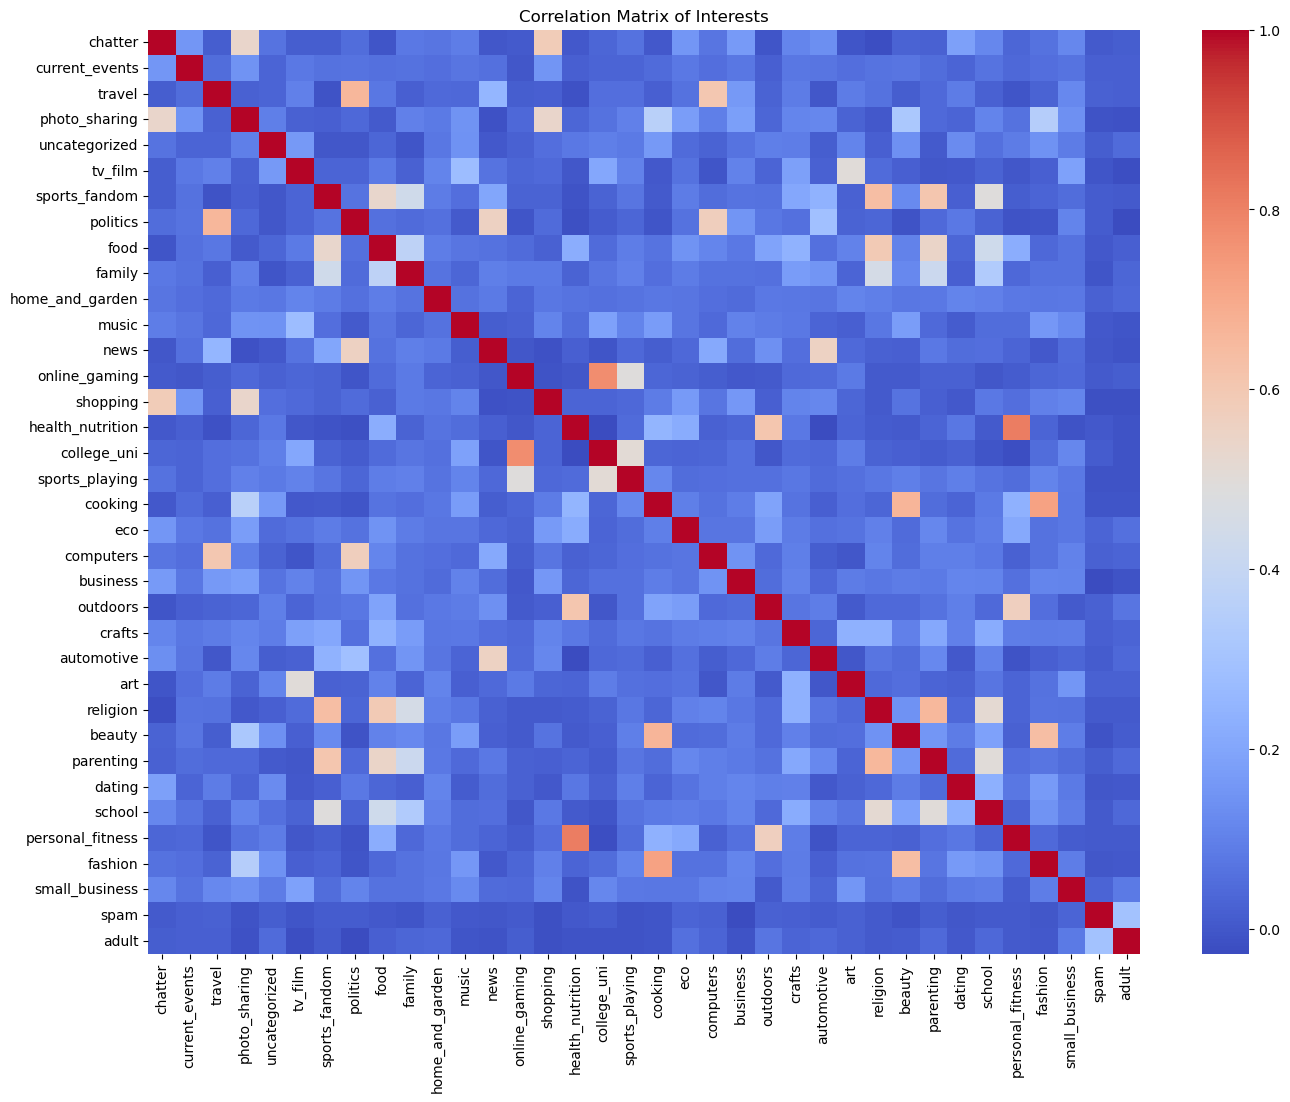

In [189]:
# Correlation matrix for each post topic
corr_matrix = df_nouser.corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Interests')
plt.show()

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_nouser)

# Implement K-Means
kmeans = KMeans(n_clusters=5, random_state=42)  # You can choose the number of clusters (e.g., 5)
df_nouser['Cluster'] = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original DataFrame
df_nouser['Cluster'] = kmeans.labels_

# Check the number of data points in each cluster
print(df_nouser['Cluster'].value_counts())

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
3    4188
4    1419
0     875
2     741
1     659
Name: count, dtype: int64


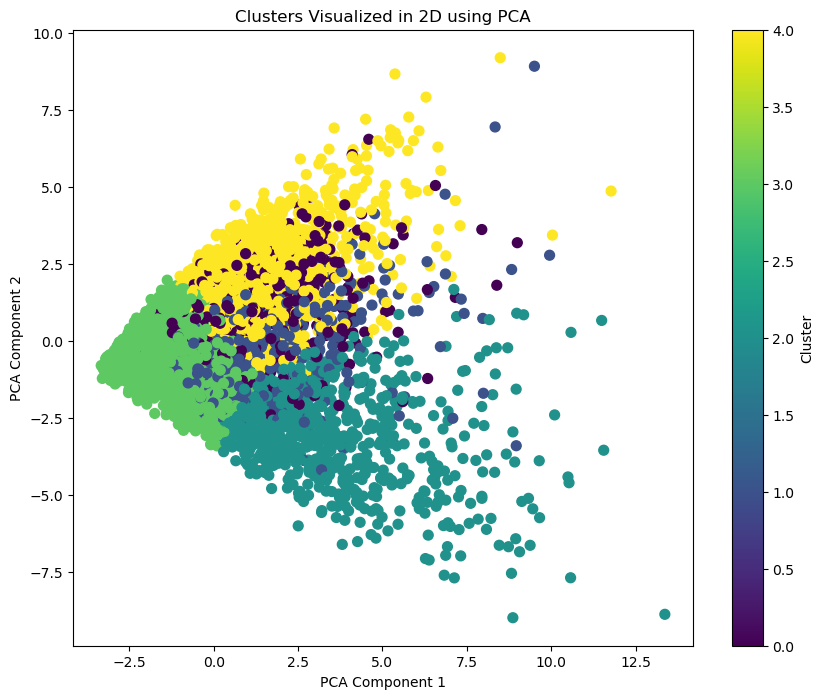

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Visualize the clusters in the PCA-reduced space
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Clusters Visualized in 2D using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Answer: 

In [ ]:
# Group by the cluster to get the mean interest profile of each cluster
cluster_profiles = df_nouser.groupby('Cluster').mean()

# Display the cluster profiles
print(cluster_profiles)

# Visualize the profiles
cluster_profiles.T.plot(kind='bar', figsize=(15, 10), colormap='tab20')
plt.title('Average Interest Profiles by Cluster')
plt.xlabel('Interest')
plt.ylabel('Average Frequency')
plt.legend(title='Cluster')
plt.show()

          chatter  current_events    travel  photo_sharing  uncategorized  \
Cluster                                                                     
0        4.086857        1.514286  1.229714       2.540571       0.949714   
1        4.379363        1.670713  5.855842       2.403642       0.770865   
2        4.094467        1.676113  1.361673       2.518219       0.742240   
3        3.660220        1.361748  1.053486       1.847182       0.659265   
4        6.938689        1.873855  1.505990       5.529951       1.238901   

          tv_film  sports_fandom  politics      food    family  ...  religion  \
Cluster                                                         ...             
0        0.896000       1.176000  1.245714  2.166857  0.774857  ...  0.770286   
1        1.121396       2.010622  9.216995  1.470410  0.921093  ...  1.053111   
2        1.071525       6.017544  1.187584  4.624831  2.560054  ...  5.408907   
3        0.823782       0.952722  0.973018  0.745224  0

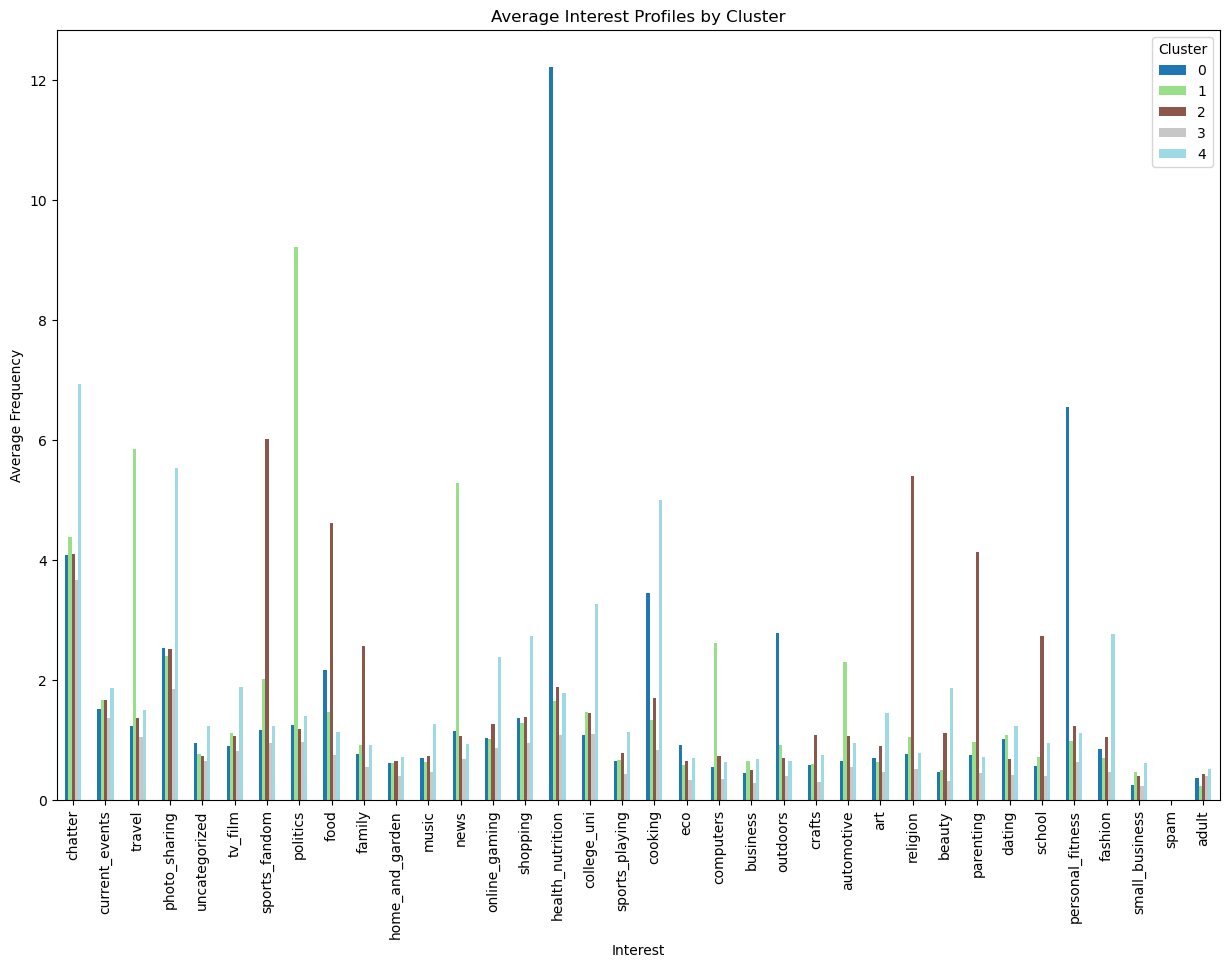

In [43]:
# Answer:

#NutrientH20 Report: We created a general correlation matrix to represent the numerical correlation between social post category, and also visually represented this using a heatmap.
# We then standardized the data, applied PCA, and implemented K-means clustering to group similar correlated interests into categories. The end result is a color-coded visualization ranking different clustered groups. 
# We then defined these 4 market segments below as unique clusters (groups) of correlated interests:
# "Adults": Sports, Food, Family, Religion, Parenting, and School. Here, we see that the group (delineated by brown) is highly interested in these topics. 
# "Active/Healthy Lifestyle Enthusiasts": This demographic (coded as dark blue) is interested in: Health/Nutrition, Outdoors, and Personal Fitness.
# "Gen Z" : Most active on social media. "Gen-Z"-ers (coded as light blue) are most interested in Chatter, Photo Sharing, Cooking, College-Uni, and Fashion. 
# "Current Affairs Hobbyists": Post frequently on Travel, Politics, News, Computers, and Automotive (shown in light green). 

### Problem: The Reuters Corpus

In [ ]:
# Question: Which clusters of top Reuters article words are associated with different authors?
# Approach: Data was pre-processed through removing duplicates, stopwords, and unnecessary punctuation.
# Then, word tokenization (a process that breaks down unstructured text data into tokens) was done. 
# PCA analysis was used to reduce feature dimensionality. In addition, t-SNE was applied to choose the number of clusters. Then, the K-means clustering method produced the clusters of word clouds associated with each author. 
# Results: 4 clusters were generated:
# For Cluster #1 (Cluster 0), top words were: "bank", "million", "market", and "percent".
# For Cluster #2 (Cluster 1), top words were: "profit", "market", "share", and "pound". 
# For Cluster #3 (Cluster 2), top words were: "china", "govern" and "bank". 
# For Cluster #4 (Cluster 3), top words were: "british", "britain", and "stock". 
# There were frequently common top words (eg. "market", "bank", "price") found in each cluster. 

# Conclusion: We can infer that based on the above clusters, there were overlapping topics that appeared in each author's article. 
# The overarching theme of the Reuters articles is finance-related (written about the economic state, banking sector, financial markets, stock price, etc.). 
# However, there appeared to be a few key words that differentiated each cluster, pertaining to the geographical region each article covered. For example, as the top word "China" was most associated with Cluster 3, Cluster 4 seems to pertain to be about Britain.
# Therefore, we can conclude that each Reuters author writes about finance, but focuses on a certain global market. 


In [7]:

import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.text import Text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer


In [9]:
nltk.download('stopwords')

# Helper function to read data from a labeled directory
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        try:
            author_path = os.path.join(directory_path, author)
            for file_name in os.listdir(author_path):
                file_path = os.path.join(author_path, file_name)
                with open(file_path, 'r', encoding='utf-8') as f:
                    texts.append(f.read())
                    labels.append(author)
        except:
            pass
    return texts, labels, authors

# frequency distribution of words
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
punctuation.add('--')
punctuation.add('``')
punctuation.add('\'\'')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\basne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Reading the training and test data.
train_texts, train_labels, train_authors = read_data_from_directory("./STA380-master/data/ReutersC50/C50train")
test_texts, test_labels, test_authors = read_data_from_directory("./STA380-master/data/ReutersC50/C50test")

In [14]:
# create pandas version for easier analysis.
train_df = pd.DataFrame({'text': train_texts, 'author': train_labels})
test_df = pd.DataFrame({'text': test_texts, 'author': test_labels})

# Since we are building clustering algorithm, we do not need train/test split
data = pd.concat([train_df, test_df], axis =0)

labels = list(data['author'])

In [17]:
data.head()

text         author
0  The Internet may be overflowing with new techn...  AaronPressman
1  The U.S. Postal Service announced Wednesday a ...  AaronPressman
2  Elementary school students with access to the ...  AaronPressman
3  An influential Internet organisation has backe...  AaronPressman
4  An influential Internet organisation has backe...  AaronPressman

In [19]:
# Preliminary analysis to see some patterns.Only on train data.
train_df['num_words'] = train_df['text'].apply(lambda x: len(str(x).split()))
train_df['num_uniq_words'] = train_df['text'].apply(lambda x: len(set(str(x).split())))
train_df['num_chars'] = train_df['text'].apply(lambda x: len(str(x)))
train_df['num_words_title'] = train_df['text'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
train_df['mean_word_len'] = train_df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
train_df['num_character_len'] = train_df['text'].apply(lambda x: len(x))

In [21]:
import itertools
import re

top10_df = pd.DataFrame()
least10_df = pd.DataFrame()

for auth in set(data['author']):
    # gather all txts for each author in the training data separately

    sub = data[data['author']== auth]
    combined_text = sub['text'].str.cat(sep=' ')

    words = word_tokenize(combined_text)

    # Filter out empty tokens
    words2 = [token for token in words if token.strip()]

    # Remove stopwords and punctuation
    filtered_words = [word.lower() for word in words2 if word.lower() not in stop_words and word not in punctuation and len(word)>2]

      # Regular expression pattern to match all numbers
    pattern = r'\d+\.?\d*'    

    # Remove all numbers from the text
    cleaned_text = [re.sub(pattern, '', wrd) for wrd in filtered_words]

    # Regular expression pattern to match specific characters
    pattern = r'[+\*&= ]'

    # Remove the specific characters
    cleaned_text = [re.sub(pattern, '', wrd) for wrd in cleaned_text]

    cleaned_text = [re.sub(r'\s+', ' ', wrd).strip() for wrd in cleaned_text]

    filtered_words = [word.lower() for word in cleaned_text if word.lower() not in stop_words and word not in punctuation and len(word)>2]

    # Calculate the frequency distribution
    fdist_filtered = FreqDist(filtered_words)
    topWords = pd.Series(dict(fdist_filtered.most_common(5)))
    leastWords = pd.Series(dict(fdist_filtered.most_common()[-5:]))

    temp = pd.DataFrame({'word':topWords.index, 'count_10': topWords.values, 'len': len(set(cleaned_text))})
    temp['author'] = auth

    temp2 = pd.DataFrame({'word':leastWords.index, 'count_5': leastWords.values, 'len': len(set(cleaned_text))})
    temp2['author'] = auth

    # What the top 10 most frequent words
    top10_df = pd.concat([top10_df, temp],axis =0)
    # what are the top 5 least frequent words
    least10_df = pd.concat([least10_df, temp2],axis =0)

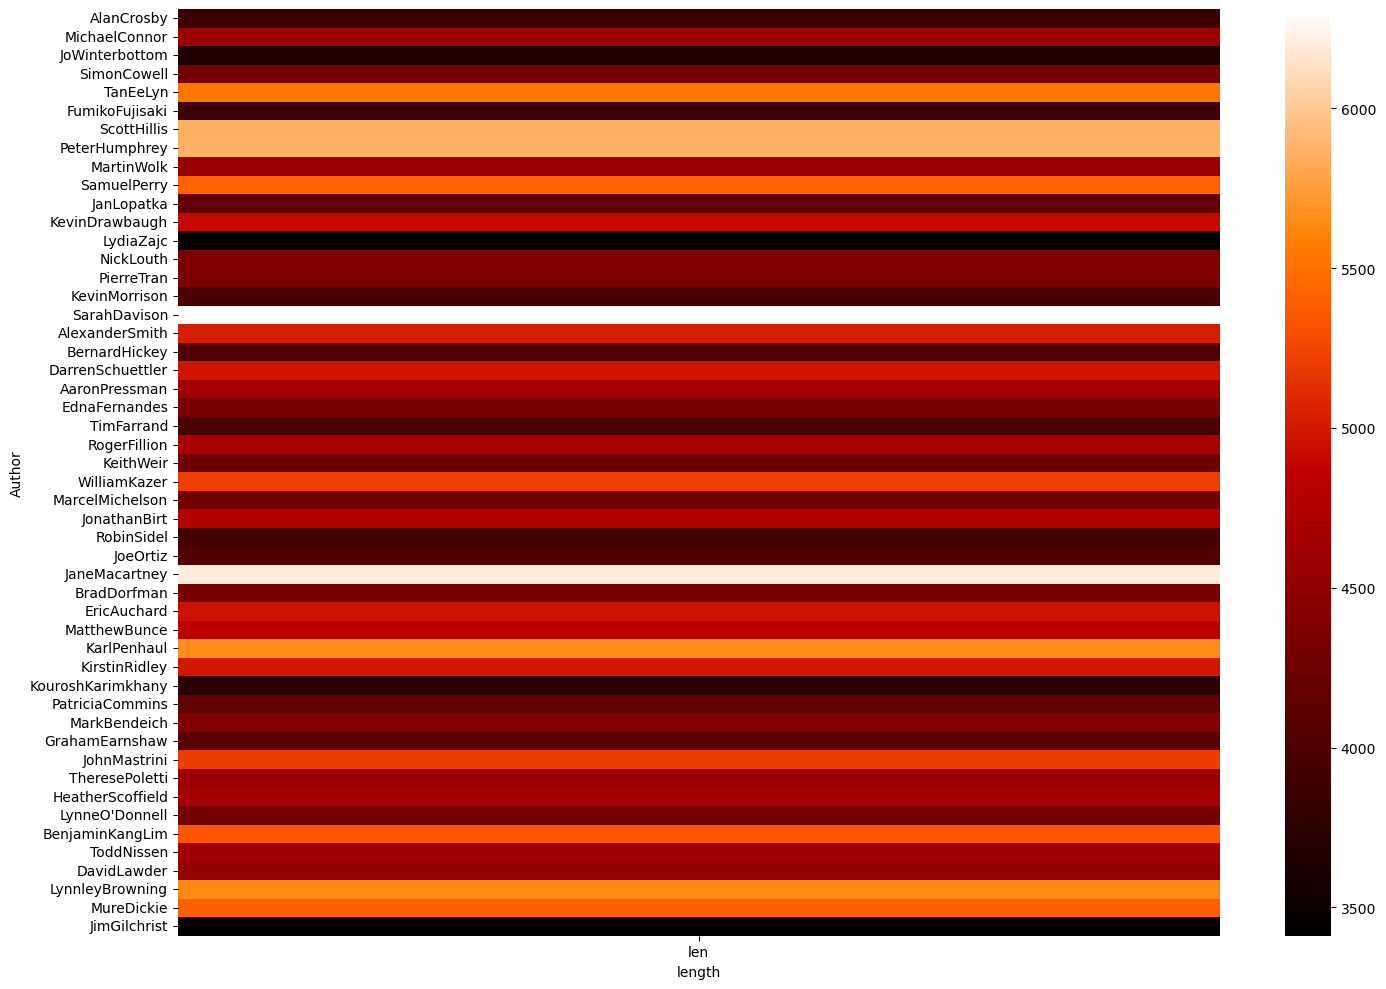

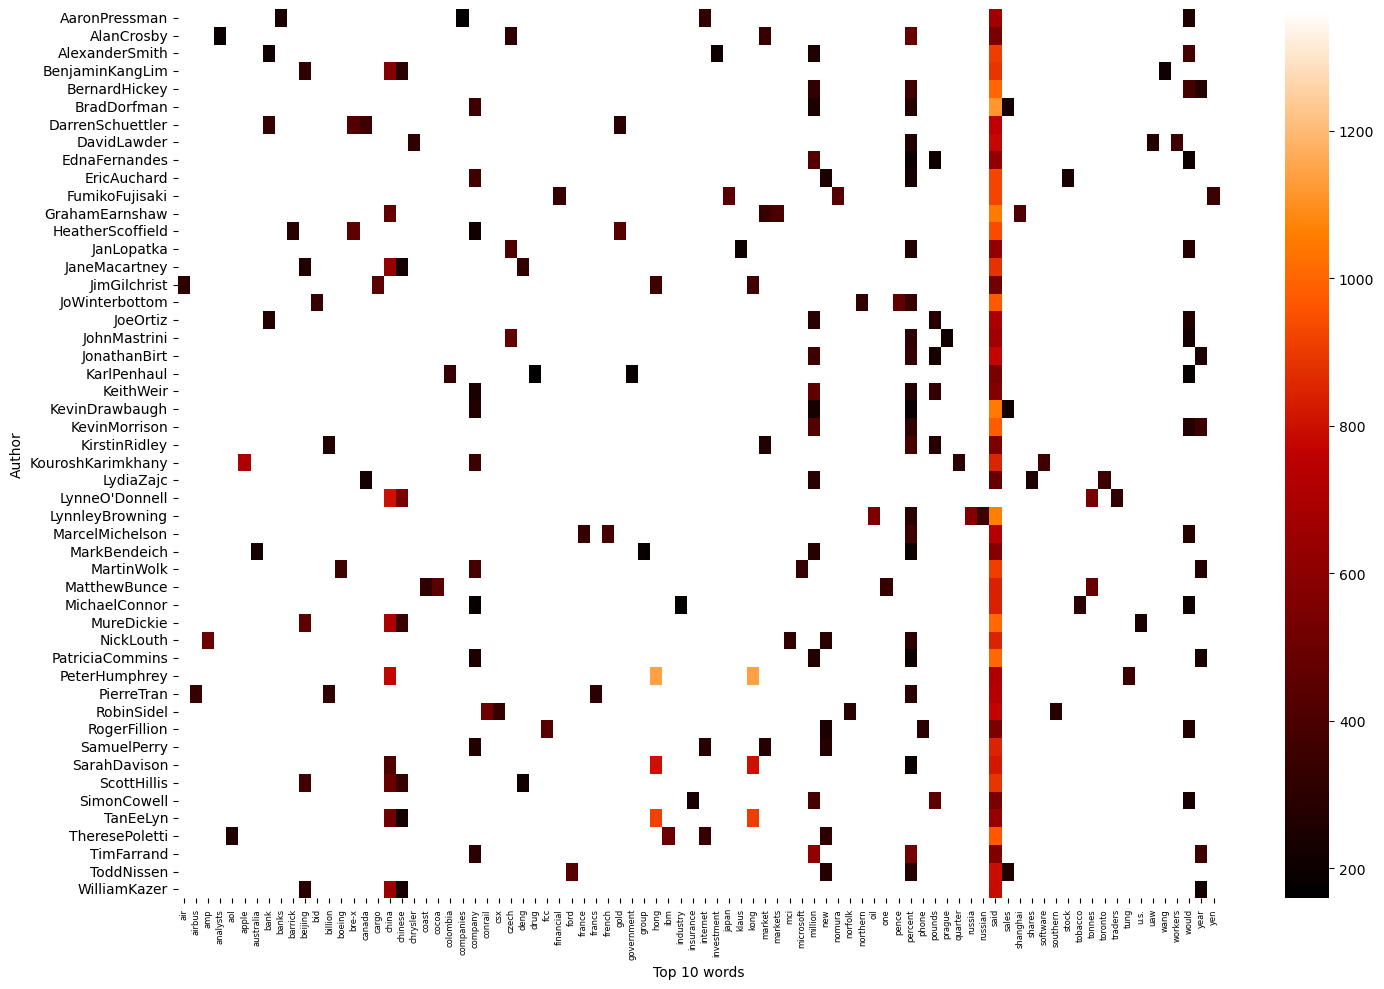

In [22]:
auth_len = top10_df[['len', 'author']].drop_duplicates()

plt.figure(figsize=(15,10))
sns.heatmap(auth_len[['author','len']].set_index(['author']), cmap='gist_heat', xticklabels=True)
plt.xlabel('length')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab( top10_df['author'], top10_df['word'], top10_df['count_10'], aggfunc="sum",), cmap='gist_heat', xticklabels=True)
plt.xticks(rotation =90, fontsize = 6)
plt.xlabel('Top 10 words')
plt.ylabel('Author')
plt.tight_layout()
plt.show()



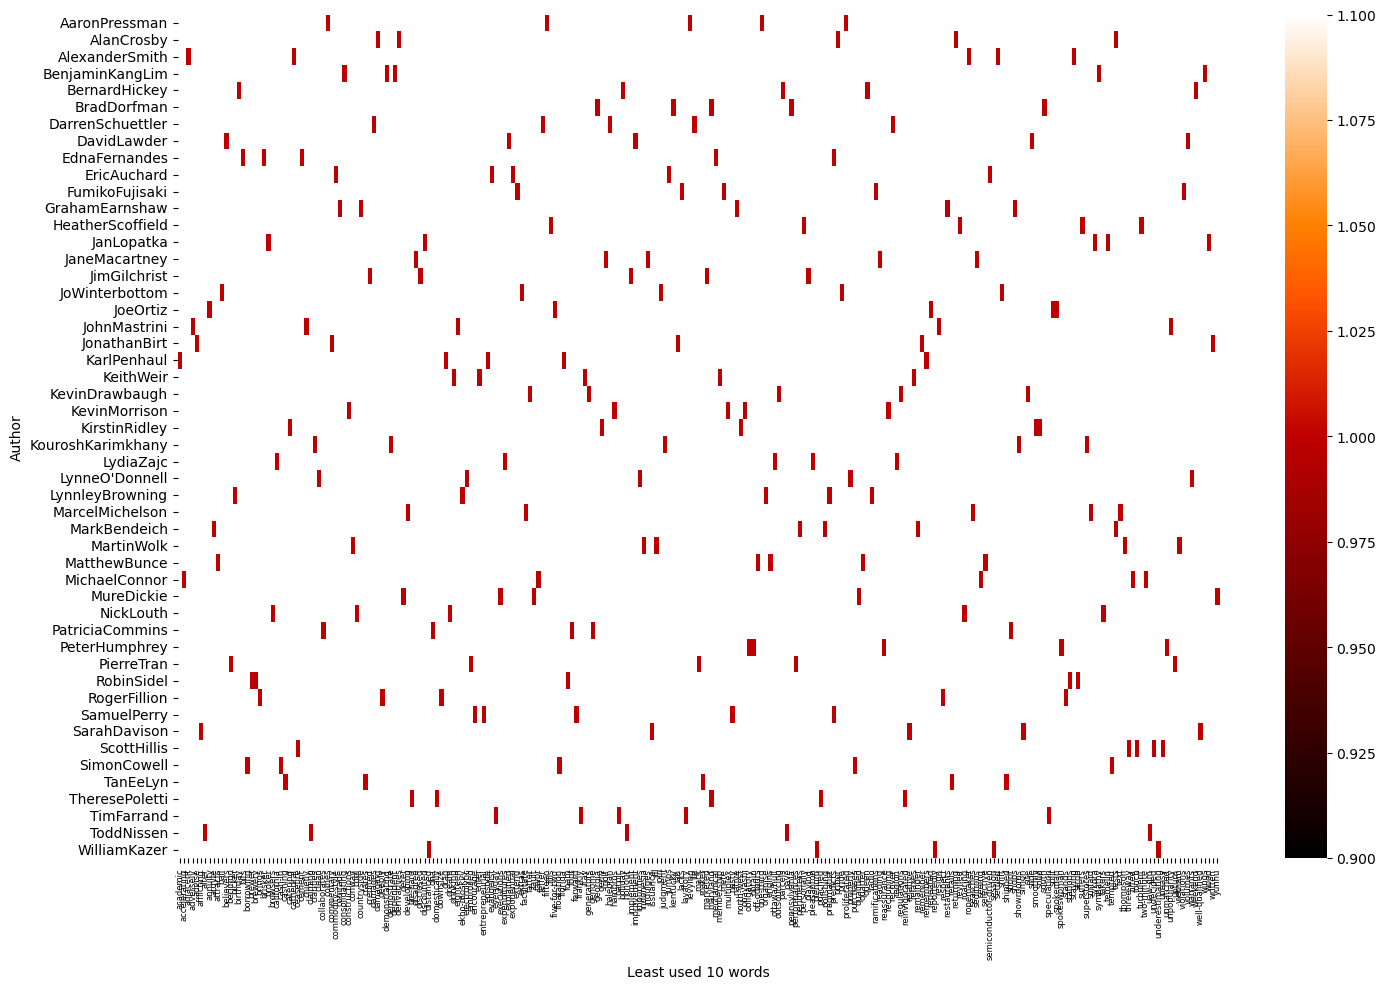

In [23]:
# least common words across each authoer
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab( least10_df['author'], least10_df['word'], least10_df['count_5'], aggfunc="sum",), cmap='gist_heat', xticklabels=True)
plt.xticks(rotation =90, fontsize = 6)
plt.xlabel('Least used 10 words')
plt.ylabel('Author')
plt.tight_layout()
plt.show()


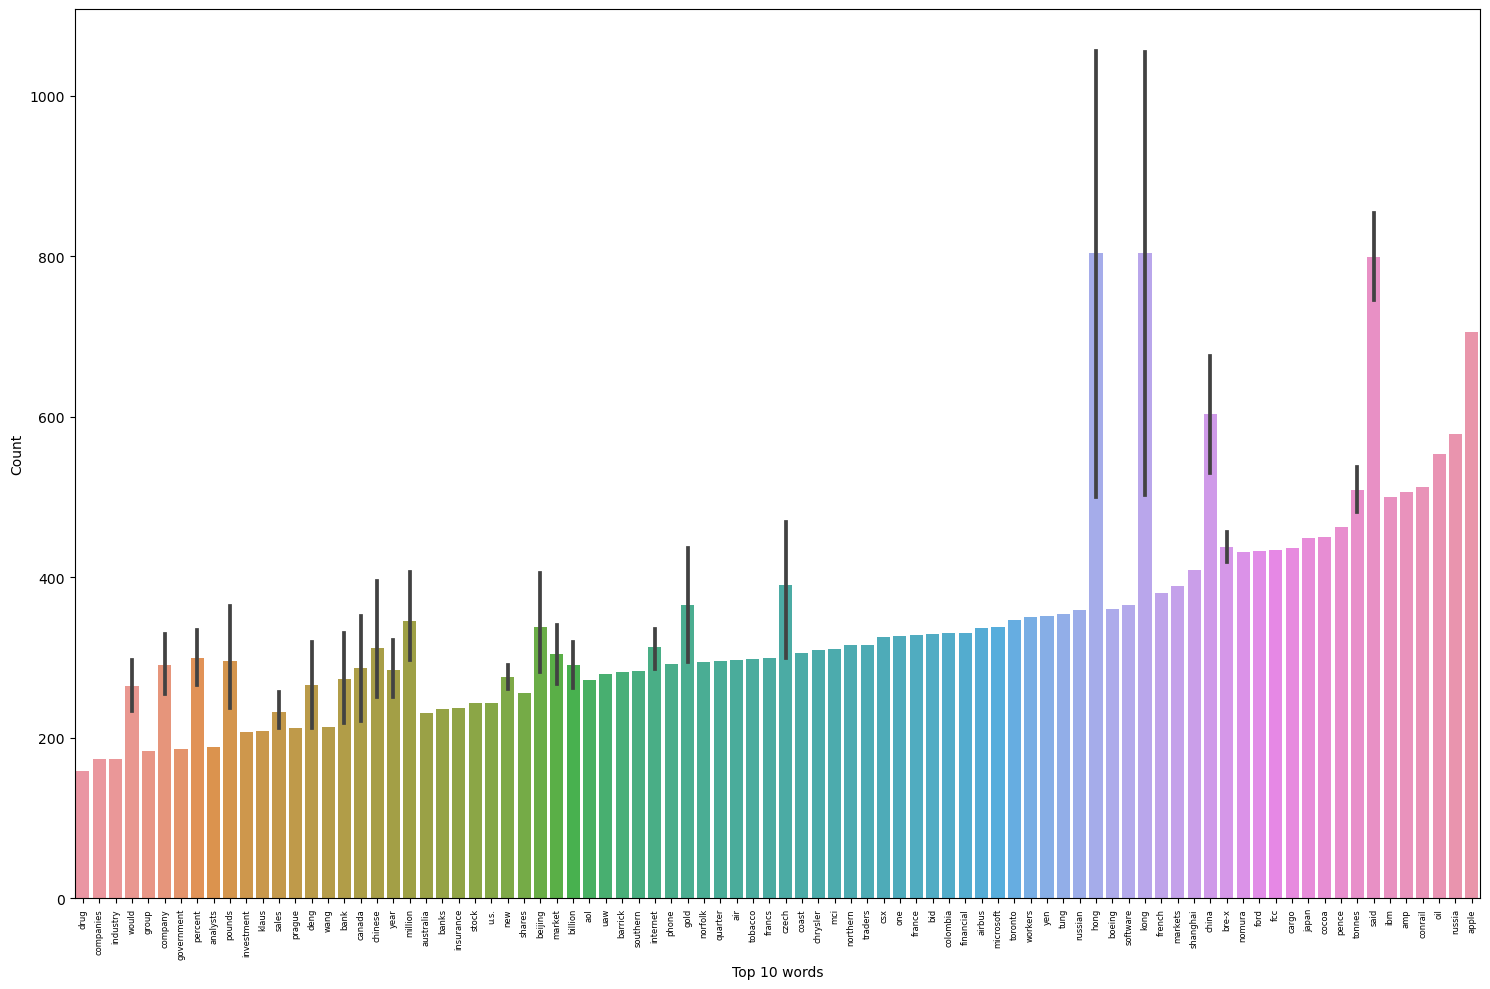

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(data =top10_df.sort_values('count_10'), x= 'word', y = 'count_10')
plt.xticks(rotation =90, fontsize = 6)
plt.xlabel('Top 10 words')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [25]:
# Helper function to tokenize, remove punctuation, and stem
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())

    # Filter out empty tokens
    words2 = [token for token in tokens if token.strip()]

    # Remove stopwords and punctuation
    filtered_words = [word.lower() for word in words2 if word.lower() not in stop_words and word not in punctuation and len(word)>2]

      # Regular expression pattern to match all numbers
    pattern = r'\d+\.?\d*'    

    # Remove all numbers from the text
    cleaned_text = [re.sub(pattern, '', wrd) for wrd in filtered_words]

    # Regular expression pattern to match specific characters
    pattern = r'[+\*&= ]'

    # Remove the specific characters
    cleaned_text = [re.sub(pattern, '', wrd) for wrd in cleaned_text]

    cleaned_text = [re.sub(r'\s+', ' ', wrd).strip() for wrd in cleaned_text]

    filtered_words = [word.lower() for word in cleaned_text if word.lower() not in stop_words and word not in punctuation and len(word)>2]
    
    # Remove punctuation
    ftokens = [token for token in filtered_words if token not in string.punctuation and token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in ftokens]
    
    return stemmed_tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\basne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Check on Pandas dataframe - all preprocessed text for wordCloud
data['token'] = data['text'].apply(lambda x: preprocess_text(x))

In [27]:
# Basic Statistics
print(f"Total number of training documents: {len(train_texts)}")
print(f"Total number of test documents: {len(test_texts)}")

Total number of training documents: 2500
Total number of test documents: 2500


In [28]:

train_doc_lengths = [len(preprocess_text(text)) for text in train_texts]
test_doc_lengths = [len(preprocess_text(text)) for text in test_texts]

print(f"\nAverage document length in training set: {np.mean(train_doc_lengths)} words")
print(f"Minimum document length in training set: {np.min(train_doc_lengths)} words")
print(f"Maximum document length in training set: {np.max(train_doc_lengths)} words")
print(f"\nAverage document length in test set: {np.mean(test_doc_lengths)} words")
print(f"Minimum document length in test set: {np.min(test_doc_lengths)} words")
print(f"Maximum document length in test set: {np.max(test_doc_lengths)} words")


Average document length in training set: 293.58 words
Minimum document length in training set: 32 words
Maximum document length in training set: 853 words

Average document length in test set: 297.9272 words
Minimum document length in test set: 37 words
Maximum document length in test set: 852 words


In [29]:
# Term Frequencies
all_tokens = [token for text in data['text'] for token in preprocess_text(text)]
common_tokens = Counter(all_tokens).most_common(10)
print("\nMost common words across the training set:")
for token, freq in common_tokens:
    print(f"{token}: {freq}")


Most common words across the training set:
said: 39982
year: 12117
compani: 10997
percent: 10762
would: 10350
million: 10004
market: 9196
analyst: 7822
share: 6999
new: 6843


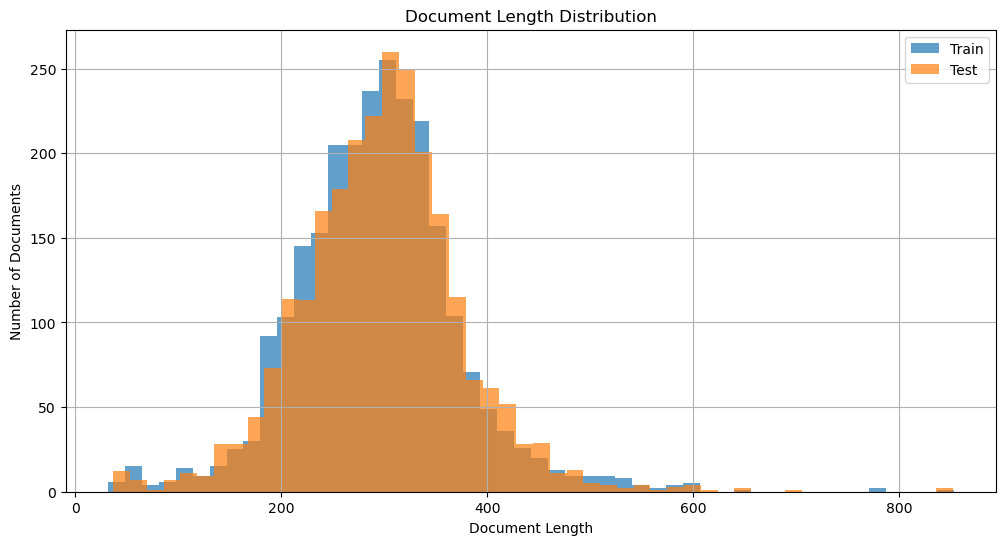

In [30]:
# Document Length Distribution
plt.figure(figsize=(12, 6))
plt.hist(train_doc_lengths, bins=50, alpha=0.7, label='Train')
plt.hist(test_doc_lengths, bins=50, alpha=0.7, label='Test')
plt.title('Document Length Distribution')
plt.xlabel('Document Length')
plt.ylabel('Number of Documents')
plt.legend()
plt.grid(True)
plt.show()

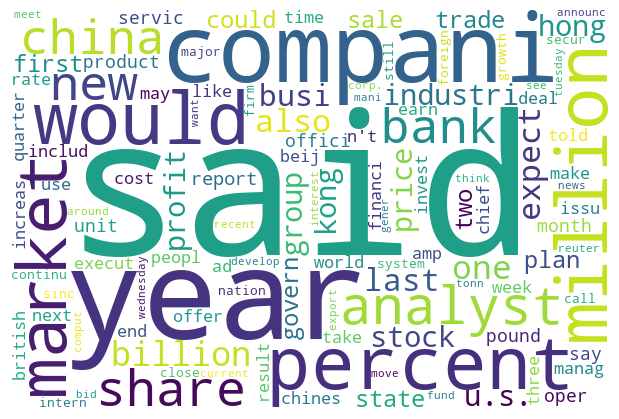

In [31]:
# make a word cloud
from wordcloud import WordCloud

# frequency distribution of words
from nltk.probability import FreqDist

# Calculate the frequency distribution
fdist = FreqDist(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width=600, height=400, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(fdist)

# Display the WordCloud
plt.figure(figsize=(6, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#### Clustering Analysis 

In [34]:
# The CountVectorizer will now use my custom tokenizer/preprocesser
vectorizer = TfidfVectorizer(tokenizer=preprocess_text, analyzer= 'word', stop_words='english', max_features=2500)

# all combined data is train since objective is to cluster
train_dtm = vectorizer.fit_transform(data['text'])

C:\Users\basne\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\basne\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 

In [36]:
# PCA with 100 components 
pca = PCA(n_components=100)
reduced_data_pca = pca.fit_transform(train_dtm.toarray())  # Convert sparse matrix to dense matrix

In [40]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

tsne = TSNE(n_components=2, perplexity=20, random_state=42)
scaler = StandardScaler()
reduced_data_pca_scaled = scaler.fit_transform(reduced_data_pca)
tsne_features = tsne.fit_transform(reduced_data_pca_scaled)

In [47]:
# apply 
from sklearn.cluster import KMeans
num_clusters = 4  # No clear clusters based on TSNE but an approximate trial
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tsne_features)


C:\Users\basne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


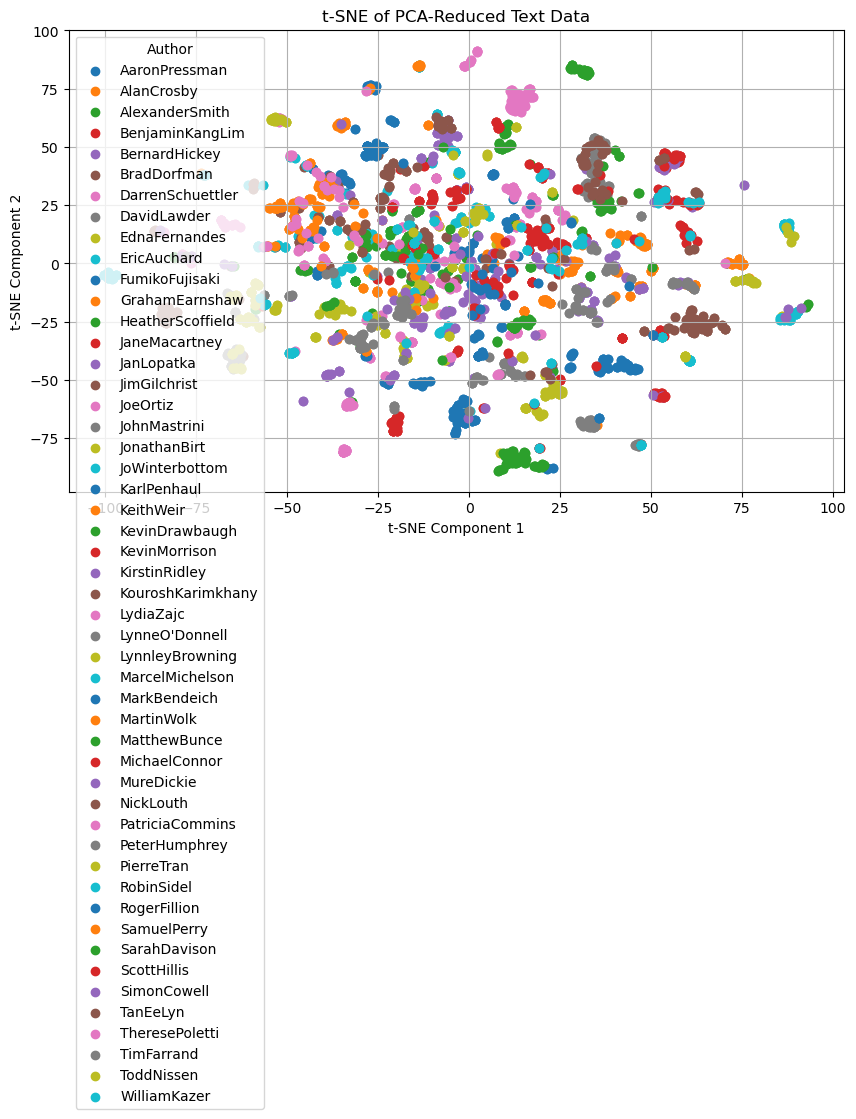

In [49]:
plt.figure(figsize=(10, 6))

# Create a scatter plot for each author
for author in data['author'].unique():
    indices = data[data['author'] == author].index
    plt.scatter(tsne_features[indices, 0], tsne_features[indices, 1], label=author)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of PCA-Reduced Text Data')
plt.legend(title='Author')
plt.grid(True)
plt.show()

In [51]:
# Add Cluster Labels to Original DataFrame
data['cluster'] = clusters

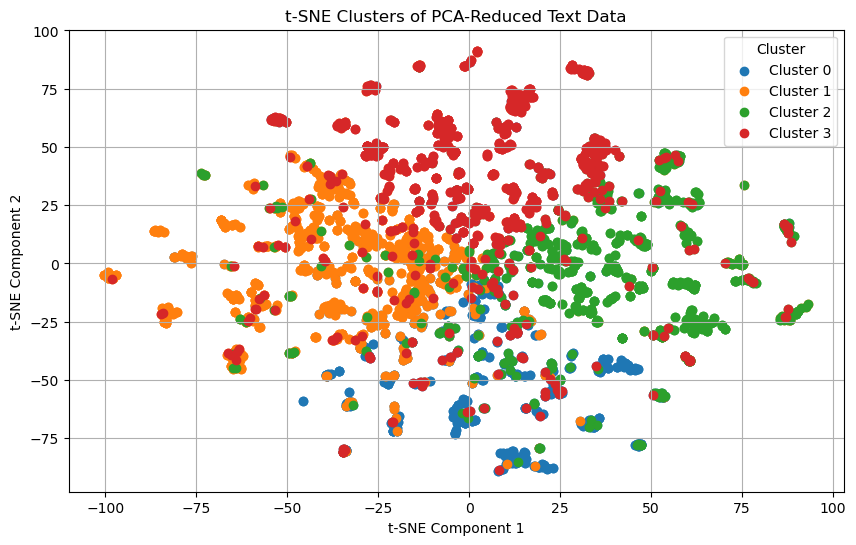

In [53]:

# plot t-SNE Results with Clusters
plt.figure(figsize=(10, 6))

# Plotting the clusters
for cluster in np.unique(clusters):
    indices = data[data['cluster'] == cluster].index
    plt.scatter(tsne_features[indices, 0], tsne_features[indices, 1], label=f'Cluster {cluster}')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Clusters of PCA-Reduced Text Data')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

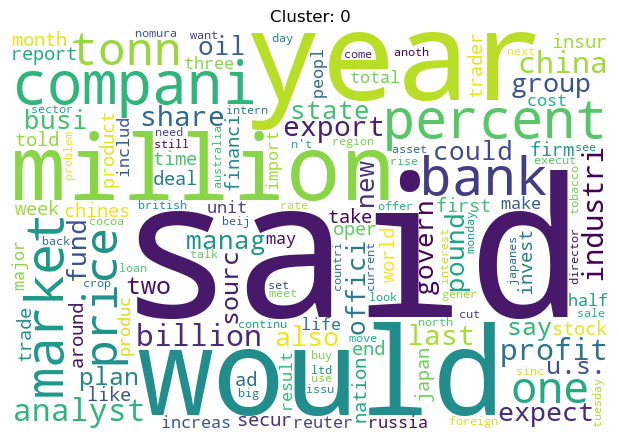

In [55]:
## Word cloud for each cluster
choose_cluster = 0

flattened_list = np.concatenate(data[data['cluster']==choose_cluster]['token'].values)

# Calculate the frequency distribution
fdist = FreqDist(flattened_list)

# Create a WordCloud object
wordcloud = WordCloud(width=600, height=400, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(fdist)

# Display the WordCloud
plt.figure(figsize=(6, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Cluster: ' + str(choose_cluster))
plt.show()

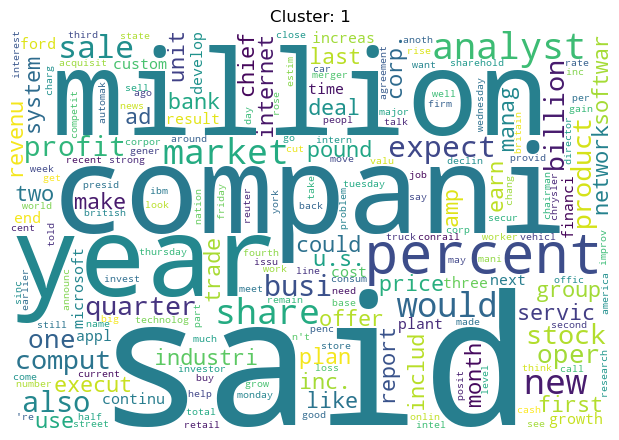

In [57]:
## Word cloud for each cluster
choose_cluster = 1
flattened_list = np.concatenate(data[data['cluster']==choose_cluster]['token'].values)

# Calculate the frequency distribution
fdist = FreqDist(flattened_list)

# Create a WordCloud object
wordcloud = WordCloud(width=600, height=400, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(fdist)

# Display the WordCloud
plt.figure(figsize=(6, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Cluster: ' + str(choose_cluster))
plt.show()

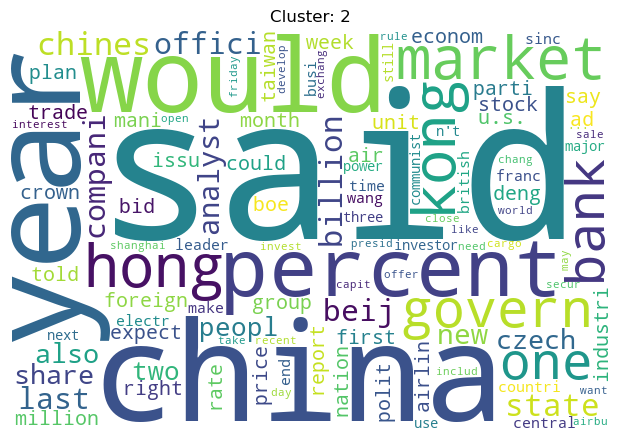

In [59]:
## Word cloud for each cluster
choose_cluster = 2
flattened_list = np.concatenate(data[data['cluster']==choose_cluster]['token'].values)

# Calculate the frequency distribution
fdist = FreqDist(flattened_list)

# Create a WordCloud object
wordcloud = WordCloud(width=600, height=400, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(fdist)

# Display the WordCloud
plt.figure(figsize=(6, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Cluster: ' + str(choose_cluster))
plt.show()

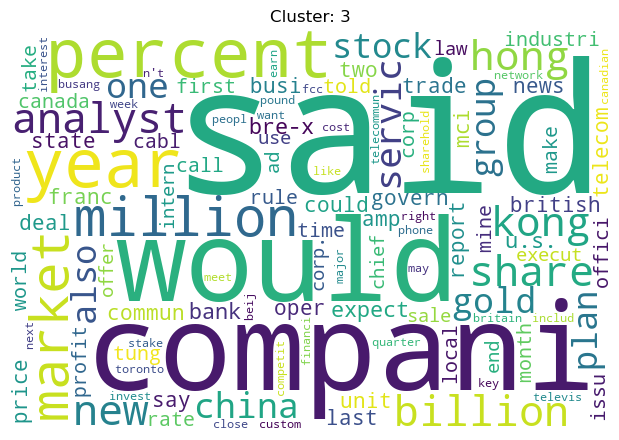

In [61]:
## Word cloud for each cluster
choose_cluster = 3
flattened_list = np.concatenate(data[data['cluster']==choose_cluster]['token'].values)

# Calculate the frequency distribution
fdist = FreqDist(flattened_list)

# Create a WordCloud object
wordcloud = WordCloud(width=600, height=400, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(fdist)

# Display the WordCloud
plt.figure(figsize=(6, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Cluster: ' + str(choose_cluster))
plt.show()

### Association Rule Mining

In [63]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Read the baskets from the text file
with open('groceries.txt', 'r') as file:
    baskets = [line.strip().split(',') for line in file]

# Transform the list of baskets into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(baskets).transform(baskets)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2) #Threshold is set to 0.2 
rules = rules[rules['lift'] >= 2.0] #Lift is set to greater than or equal to 2

# Sort and display the top 10 rules
rules.sort_values(by='lift', ascending=False, inplace=True)
top_rules = rules.head(10)
print(top_rules)

# Answer: As depicted below, Zhang's metric shows the highest positive association (0.725409) between the items yogurt and other vegetables being bought together with whipped/sour cream. 

                            antecedents                     consequents  \
158    (citrus fruit, other vegetables)               (root vegetables)   
208          (other vegetables, yogurt)            (whipped/sour cream)   
186  (tropical fruit, other vegetables)               (root vegetables)   
2                                (beef)               (root vegetables)   
156     (root vegetables, citrus fruit)              (other vegetables)   
184   (root vegetables, tropical fruit)              (other vegetables)   
189      (other vegetables, whole milk)               (root vegetables)   
190                   (root vegetables)  (other vegetables, whole milk)   
155                            (butter)  (other vegetables, whole milk)   
164                  (curd, whole milk)                        (yogurt)   

     antecedent support  consequent support   support  confidence      lift  \
158            0.028876            0.108998  0.010371    0.359155  3.295045   
208            0

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


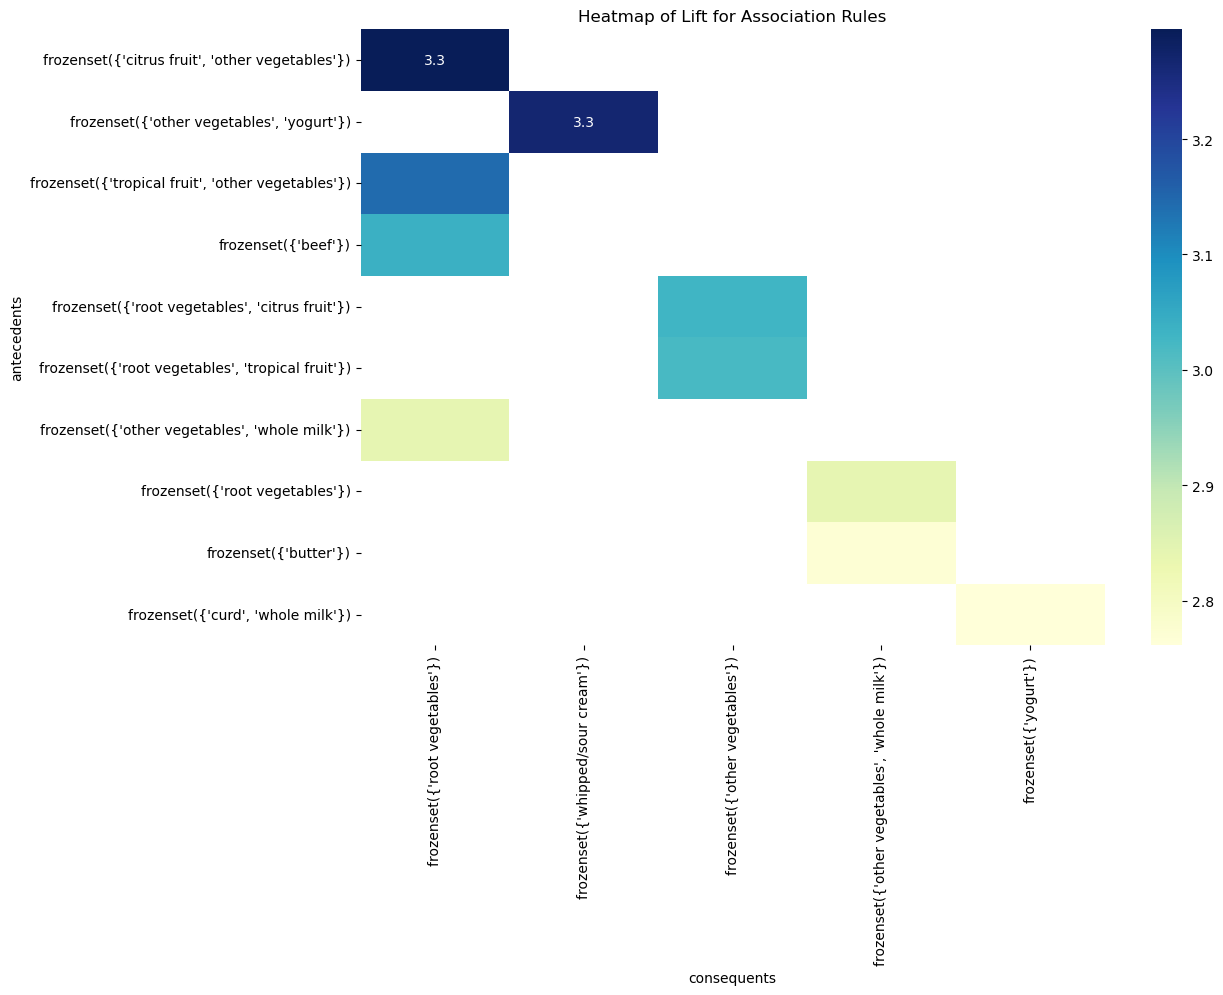

In [67]:
import seaborn as sns

# Prepare data for the heatmap
heatmap_data = top_rules.pivot_table(index='antecedents', columns='consequents', values='lift')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Lift for Association Rules')
plt.show()

# Answer: This heatmap shows that people who buy citrus or tropical fruit (with other vegetables) are 3.3x more likely to buy these items together with root vegetables (frequent itemset). 
# In addition, those who buy yogurt are most likely (3.3x) to purchase whipped/sour cream together. 

### Image Classification with Neural Networks

In [254]:
pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 10.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 20.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [22]:
# Define transformations for the training and test sets
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to a fixed size
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats
])

# Load the dataset
dataset = datasets.ImageFolder(root='/Users/amodbasnet/Documents/Machine_learning_R/STA380-master/data/EuroSAT_RGB', transform=transform)

# Split the dataset into training (80%) and testing (20%)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)




In [118]:
dataset[0]

(tensor([[[ 0.4337,  0.4337,  0.4166,  ..., -0.3369, -0.3541, -0.3541],
          [ 0.4337,  0.4337,  0.4166,  ..., -0.3369, -0.3541, -0.3541],
          [ 0.4337,  0.4337,  0.4337,  ..., -0.3369, -0.3541, -0.3541],
          ...,
          [ 0.0741,  0.0912,  0.1083,  ..., -0.3027, -0.2856, -0.2856],
          [ 0.0056,  0.0056,  0.0227,  ..., -0.3027, -0.2856, -0.2856],
          [-0.0287, -0.0287, -0.0287,  ..., -0.3027, -0.2856, -0.2856]],
 
         [[ 0.0826,  0.0826,  0.0826,  ..., -0.4251, -0.4426, -0.4426],
          [ 0.0826,  0.0826,  0.0826,  ..., -0.4251, -0.4426, -0.4426],
          [ 0.0826,  0.0826,  0.0826,  ..., -0.4251, -0.4426, -0.4426],
          ...,
          [-0.1099, -0.1099, -0.1099,  ..., -0.3901, -0.3725, -0.3725],
          [-0.1625, -0.1625, -0.1625,  ..., -0.3725, -0.3725, -0.3725],
          [-0.1800, -0.1800, -0.1975,  ..., -0.3725, -0.3725, -0.3725]],
 
         [[ 0.2871,  0.2871,  0.2871,  ..., -0.0267, -0.0441, -0.0441],
          [ 0.2871,  0.2871,

In [24]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(32 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 10)  # Assume we have 10 classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 32 * 32)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [28]:
# Instantiate the model
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [30]:
num_epochs = 10
model.train()

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

Epoch 1/10, Loss: 0.9414604249706975
Epoch 2/10, Loss: 0.5519110127731606
Epoch 3/10, Loss: 0.37356671175471057
Epoch 4/10, Loss: 0.22774243652268691
Epoch 5/10, Loss: 0.16479245504709306
Epoch 6/10, Loss: 0.11823811118870421
Epoch 7/10, Loss: 0.07977521827375447
Epoch 8/10, Loss: 0.07661140528955945
Epoch 9/10, Loss: 0.07255601699395037
Epoch 10/10, Loss: 0.0437584841941673


In [143]:
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        all_labels.extend(labels)
        outputs = model(images)
        x, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")

#Answer: The overall test-set accuracy of this model is 79.2%. 

Accuracy: 79.22222222222223%


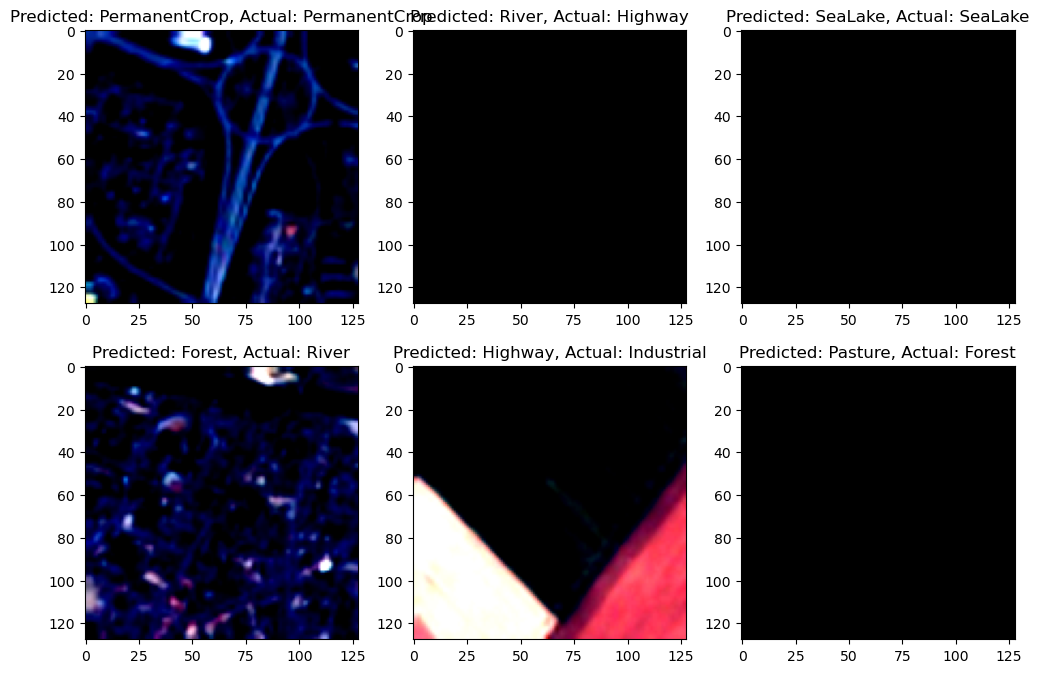

In [146]:
# Display some test images with their predicted classes
fig = plt.figure(figsize=(12, 8))
for i in range(6):
    ax = fig.add_subplot(2, 3, i + 1)
    img = test_dataset[i][0].permute(1, 2, 0).numpy()
    img = np.clip(img, 0, 1)
    ax.imshow(img)
    ax.set_title(f"Predicted: {dataset.classes[predicted[i]]}, Actual: {dataset.classes[labels[i]]}")
plt.show()

#Answer: These show some of the example images from the test set, together with my model's predicted classes.

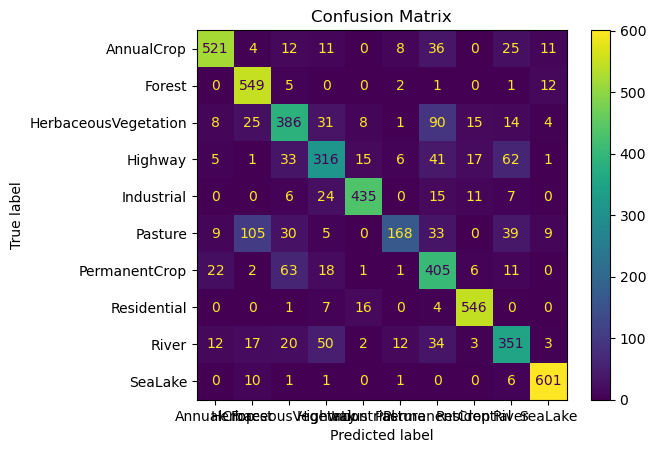

In [148]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

#Answer: This is the plotted confusion matrix. 